# DATA CHALLENGE

## Problem Statement

An airline firm is looking to enter the US domestic airline market. The company has already decided to begin with 5 round trips between medium and large US airports. 

Keeping the brand motto in mind "On Time, for you" as a consultant we need to build a data product with supportive concnlusions as to which 5 round trips route are best investment options for entering the domestic airline market in US.

## Data Sources

There are three data sources:

1.  Tickets dataset provides information on the ticket prices.
2.  Airports dataset provides information whether an airport is considered medium or large sized. 
3.  Flights dataset provdies information the available routes from origin to destination.

## Assumptions

1. All carriers are given equal importance. 
2. The time value of ticket price per passenger is 0%(i.e $1 today is the same worth as 100 years from now )
3. Flights that have monopoly in a specific route is ignored from being considered as a prospective candidate in the best routes for instance Hawian Airlines.

## Approach

Since we are using data to solve a business problem, let’s keep the following framework in mind while approaching the problem:

1. No Hardcoding: The analysis should be reusable for a new prospective route or a different kind of airport type.

2. Business Understanding: The goal is to select best flight roundtrip routes to maximize profits and hence, all factors needed to evaluate the same should be critically analyzed.

3. Data Understanding: All variables should be clearly understood and only the ones pertinent to the problem should be selected and cleaned for analysis.

4. Assumptions: All assumptions in addition to the ones already mentioned should be backed by data/reasoning from external sources or derived from existing assumptions.

5. Profitability Metrics: Based on available data, profitability metrics should be defined and visualized to aid decision making.

## Data Quality Check

### Environment Setup

Importing the required packages for our analysis

In [135]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import warnings
import missingno as msno
warnings.filterwarnings("ignore")

import plotly.graph_objects as go

from matplotlib import pyplot as plt

# Setting maximum number of rows and columns to display in the notebook
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)

sns.set(rc={'figure.figsize':(15,8)})

### Data Understanding

Three important criteria for checking the quality of data in this context are:

#### 1. Accuracy

The values present in all columns should be accurate.

#### 2. Completeness

The data should not have any missing values.

#### 3. Consistency

Two related columns should not give conflicting information.

Before we begin the quality check, let’s ensure we only use data needed for the scope of the problem.

## Exploring the Airport Codes data

Airports Codes Dataset: Exploring the dataset

In [136]:
# Reading the Airport_Codes.csv file
airports = pd.read_csv('Airport_Codes.csv')

#### Size of the data

In [137]:
airports.shape

(55369, 8)

We have data corresponding to 55369 airports assuming each row corresponds to a unique airport

#### Sample data

In [138]:
airports.head()

TYPE                                NAME  ELEVATION_FT CONTINENT  \
0       heliport                   Total Rf Heliport          11.0       NaN   
1  small_airport                Aero B Ranch Airport        3435.0       NaN   
2  small_airport                        Lowell Field         450.0       NaN   
3  small_airport                        Epps Airpark         820.0       NaN   
4         closed  Newport Hospital & Clinic Heliport         237.0       NaN   

  ISO_COUNTRY  MUNICIPALITY IATA_CODE                            COORDINATES  
0          US      Bensalem       NaN     -74.93360137939453, 40.07080078125  
1          US         Leoti       NaN                 -101.473911, 38.704022  
2          US  Anchor Point       NaN            -151.695999146, 59.94919968  
3          US       Harvest       NaN  -86.77030181884766, 34.86479949951172  
4          US       Newport       NaN                    -91.254898, 35.6087

#### Checking the data types of all columns

In [139]:
airports.dtypes

TYPE             object
NAME             object
ELEVATION_FT    float64
CONTINENT        object
ISO_COUNTRY      object
MUNICIPALITY     object
IATA_CODE        object
COORDINATES      object
dtype: object

#### Checking the null counts for all columns

In [140]:
airports.isna().sum()

TYPE                0
NAME                0
ELEVATION_FT     7015
CONTINENT       27843
ISO_COUNTRY       247
MUNICIPALITY     5706
IATA_CODE       46187
COORDINATES         0
dtype: int64

#### Plotting the missing values in the Airports Dataset

<AxesSubplot:>

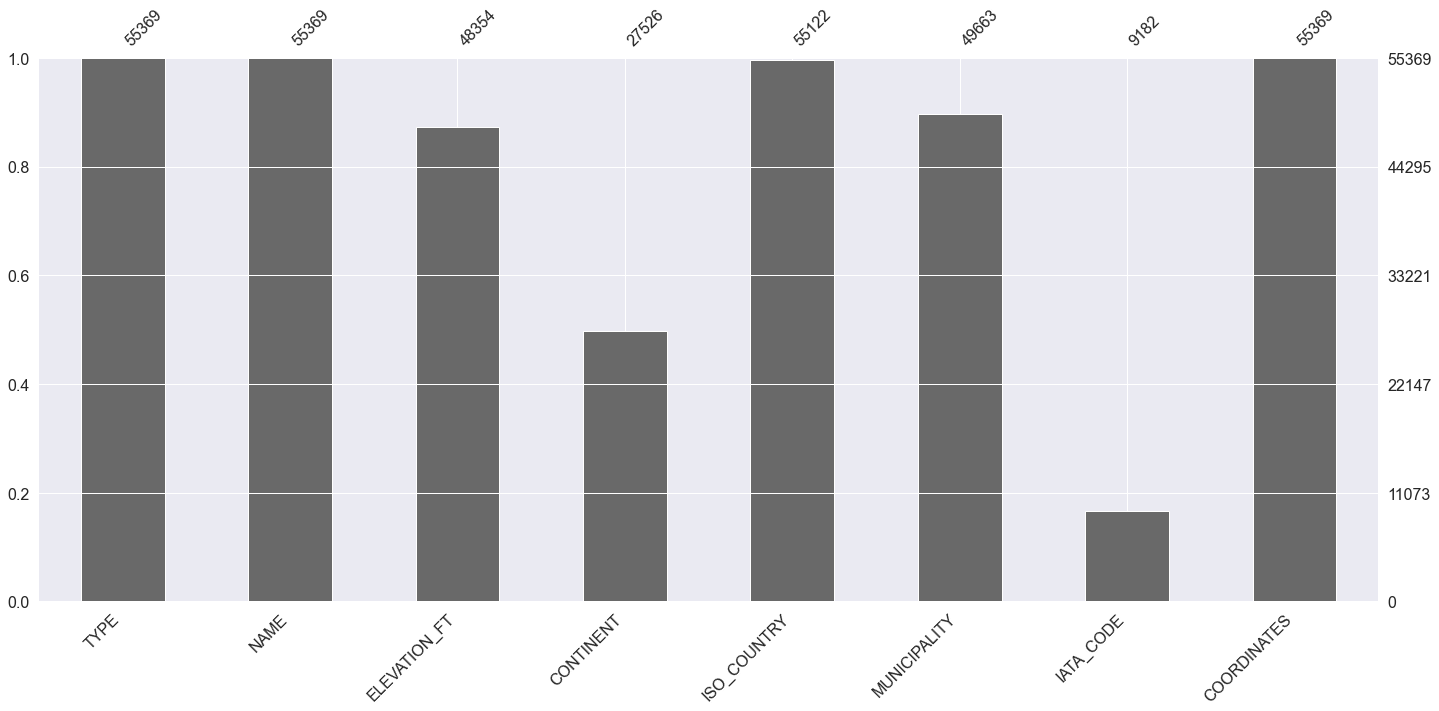

In [141]:
msno.bar(airports)

We can see that the data is not clean since there are missing values for the continent to which the airport belongs and the IATA code for the corresponding airport

We are primarily interested in only medium and large size airports based in US. So we will first filter the data for these criteria and then carry on with our analysis.  
  
Basic check on the data shows that there are no null values in the TYPE column and hence we do not need to do any pre processing/imputation on the TYPE column before filtering.  
  
**Data Limitation:** We can observe that there are **247 NULL** values in **ISO_COUNTRY** column. This is a potential issue since we want to **limit our analysis for domestic US airports**. We can observe that there is **NO NULL** value in the **COORDINATES** column. We can use this data to obtain the missing datapoints for ISO_COUNTRY columns.  
  
We will first filter the data by TYPE for 'Medium' and 'Large' size airports to see if the issue still exists

### Filtering for Medium and Large airports

In [142]:
airports['TYPE'].value_counts()

small_airport     34120
heliport          11384
medium_airport     4532
closed             3680
seaplane_base      1016
large_airport       614
balloonport          23
Name: TYPE, dtype: int64

There are **4532 Medium** sized and **614 Large** sized airports

In [143]:
filter_condition = ['large_airport','medium_airport']
airport_subset = airports[airports['TYPE'].isin(filter_condition)]

#### Plotting the Airport Types

<AxesSubplot:xlabel='ISO_COUNTRY', ylabel='count'>

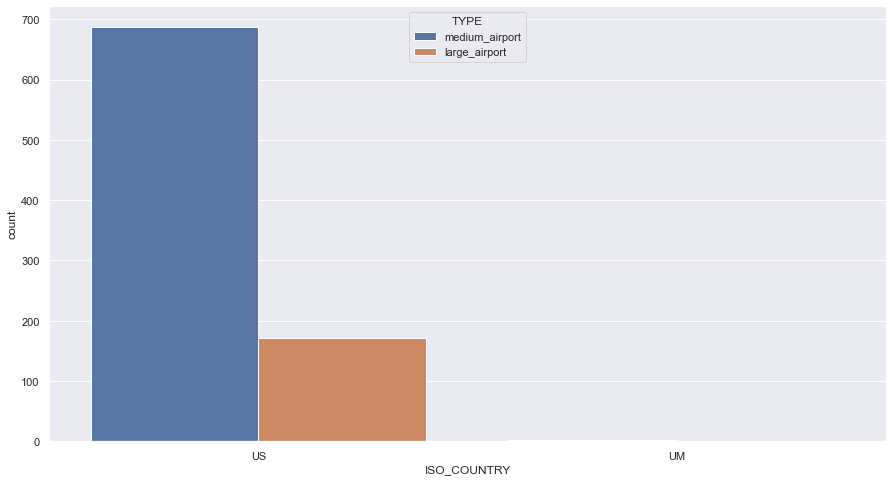

In [52]:
sns.countplot(x = airport_subset[airport_subset['ISO_COUNTRY'].isin(['US','UM'])]['ISO_COUNTRY'],hue = airport_subset['TYPE'], data = airport_subset)

#### Examining the NULL value counts again for the subset of the data

In [144]:
airport_subset.isna().sum()

TYPE               0
NAME               0
ELEVATION_FT     204
CONTINENT       1448
ISO_COUNTRY       12
MUNICIPALITY     535
IATA_CODE        687
COORDINATES        0
dtype: int64

**Percentage counts**

In [145]:
round(airport_subset.isna().sum()*100/airport_subset.isna().sum().sum(),2)

TYPE             0.00
NAME             0.00
ELEVATION_FT     7.07
CONTINENT       50.17
ISO_COUNTRY      0.42
MUNICIPALITY    18.54
IATA_CODE       23.80
COORDINATES      0.00
dtype: float64

We can see that the NULL value count dropped from **247 to 12**, which corresponds to **0.42%** of the data so we will ignore these rows and further filter by **ISO_COUNTRY = US**

### Filtering for US based airports

In [146]:
airport_subset['ISO_COUNTRY'].value_counts()

US    858
CA    338
CN    288
RU    272
AU    191
FR    144
BR    128
IN    118
JP    111
GB    101
DE     81
IT     76
AR     70
MX     66
ZA     63
IR     62
CO     60
TR     58
ID     55
PH     55
ES     52
SE     50
VE     49
NO     46
TH     42
PK     40
NZ     38
DZ     37
SA     36
CL     33
PT     32
UA     32
PE     31
IQ     31
FI     31
PL     29
BS     29
MY     28
EG     28
GR     28
PF     27
KZ     26
CU     26
NG     25
KR     23
MG     23
MM     22
TW     21
VN     21
PG     21
AO     21
RO     21
CD     21
KE     17
DK     17
CR     17
KP     17
EC     16
MA     16
NL     15
BO     15
MZ     15
LY     14
CH     14
ET     13
TN     12
TZ     12
CZ     12
AZ     12
GA     11
GE     11
NC     11
YE     11
BZ     11
BY     11
BG     11
IE     11
AE     11
IL     11
BE     11
DO     10
CM     10
HU     10
LK     10
MN     10
SN     10
SY     10
BD      9
IS      9
ZW      9
AT      8
ZM      8
PA      8
SD      8
HN      8
AF      8
HR      8
SK      8
CI      7
OM      7


In [147]:
airport_subset[airport_subset['ISO_COUNTRY'].isin(['US','UM'])]['ISO_COUNTRY'].value_counts()

US    858
UM      2
Name: ISO_COUNTRY, dtype: int64

The ISO_COUNTRY code UM corresponds to US Minor Outlying Islands. There are only **2** such airports, hence we are not considering them for further analysis. Further, we make the ***assumption*** that all airports having the ISO_COUNTRY code US are **domestic airports**

In [148]:
US_airport_subset = airport_subset[airport_subset['ISO_COUNTRY'] == 'US']

#### Size of the subset

In [149]:
US_airport_subset.shape

(858, 8)

#### Checking for NULL IATA codes

In [150]:
US_airport_subset['IATA_CODE'].isna().sum()

37

**We require IATA codes for joining the data with the ticket and the flight dataset. Hence we will drop the rows with NULL IATA codes**

In [151]:
US_airport_subset = US_airport_subset[~US_airport_subset['IATA_CODE'].isna()]

In [152]:
US_airport_subset.shape

(821, 8)

**We will use this subset of 821 US airports for further analysis.**

In [153]:
US_airport_subset['TYPE'].value_counts()

medium_airport    651
large_airport     170
Name: TYPE, dtype: int64

## Exploring the Tickets data

In [154]:
# Reading the Tickets.csv dataset
tickets = pd.read_csv('Tickets.csv')
# Shape of the dataset
tickets.shape

(1167285, 12)

In [155]:
# Veiwing the first 5 rows of the dataset
tickets.head().T

0             1             2             3  \
ITIN_ID            201912723049  201912723085  201912723491  201912723428   
YEAR                       2019          2019          2019          2019   
QUARTER                       1             1             1             1   
ORIGIN                      ABI           ABI           ABI           ABI   
ORIGIN_COUNTRY               US            US            US            US   
ORIGIN_STATE_ABR             TX            TX            TX            TX   
ORIGIN_STATE_NM           Texas         Texas         Texas         Texas   
ROUNDTRIP                   1.0           1.0           1.0           1.0   
REPORTING_CARRIER            MQ            MQ            MQ            MQ   
PASSENGERS                  1.0           1.0           1.0           1.0   
ITIN_FARE                 736.0         570.0         564.0         345.0   
DESTINATION                 DAB           COS           MCO           LGA   

                              4  
ITIN_ID            201912723509  
YEAR                       2019  
QUARTER                       1  
ORIGIN                      ABI  
ORIGIN_COUNTRY               US  
ORIGIN_STATE_ABR             TX  
ORIGIN_STATE_NM           Texas  
ROUNDTRIP                   0.0  
REPORTING_CARRIER            MQ  
PASSENGERS                  1.0  
ITIN_FARE                 309.0  
DESTINATION                 MGM

#### Checking the dtypes and Missing Value counts

In [156]:
tickets.dtypes

ITIN_ID                int64
YEAR                   int64
QUARTER                int64
ORIGIN                object
ORIGIN_COUNTRY        object
ORIGIN_STATE_ABR      object
ORIGIN_STATE_NM       object
ROUNDTRIP            float64
REPORTING_CARRIER     object
PASSENGERS           float64
ITIN_FARE             object
DESTINATION           object
dtype: object

In [157]:
tickets.isna().sum()

ITIN_ID                 0
YEAR                    0
QUARTER                 0
ORIGIN                  0
ORIGIN_COUNTRY          0
ORIGIN_STATE_ABR        0
ORIGIN_STATE_NM         0
ROUNDTRIP               0
REPORTING_CARRIER       0
PASSENGERS           1977
ITIN_FARE             960
DESTINATION             0
dtype: int64

<AxesSubplot:>

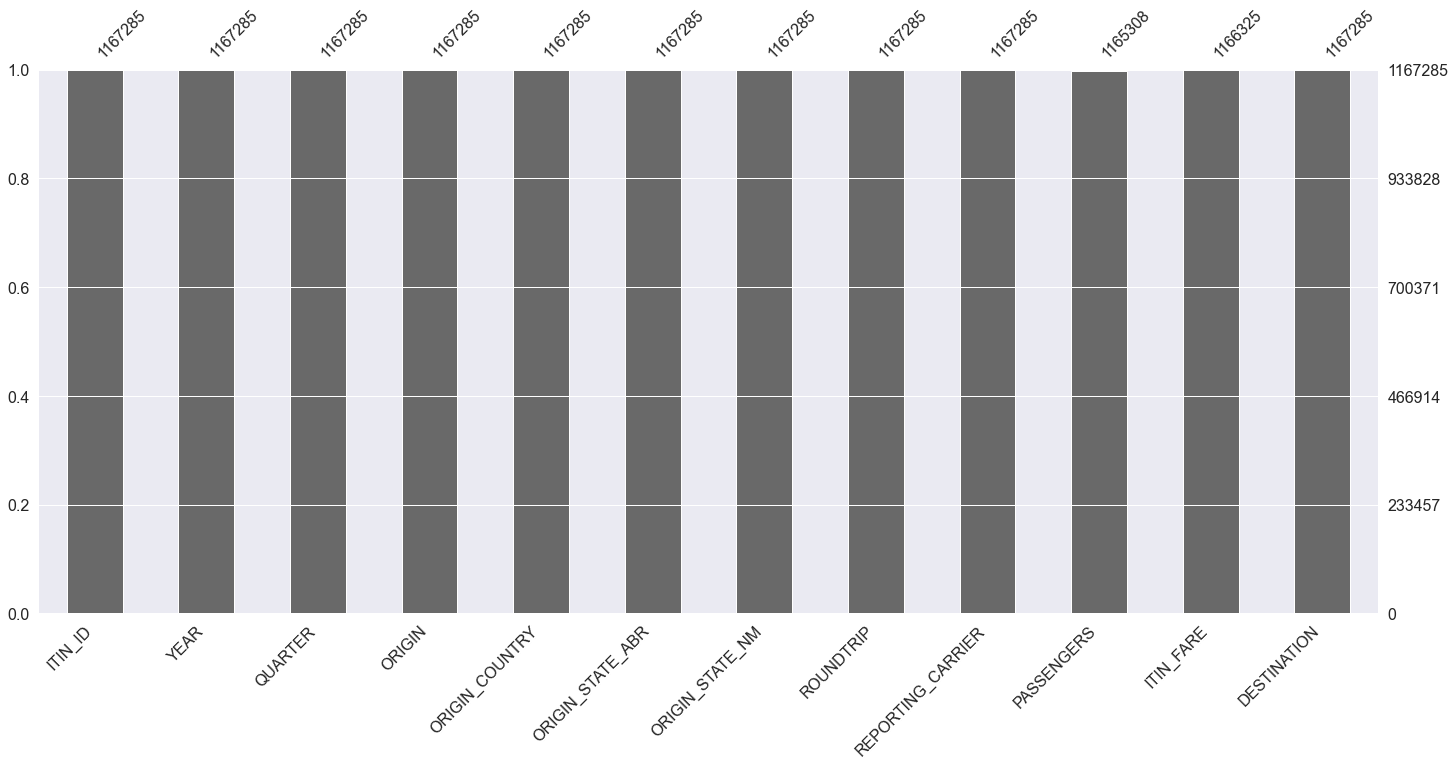

In [158]:
msno.bar(tickets)

We observe that **ITIN_FARE** is of type **object**. We will have to clean this column. Also, **PASSENGERS** and **ITIN_FARE**, both these columns have **missing data**. We will have to impute the missing data appropriately.

#### Filtering the data for round trips

In [159]:
tickets['ROUNDTRIP'].value_counts()

1.0    708600
0.0    458685
Name: ROUNDTRIP, dtype: int64

In [160]:
tickets = tickets[tickets['ROUNDTRIP'] == 1.0]

In [161]:
print(f"The number of itinerary after filtering for Round Trip Tickets: {tickets.shape[0]}")

The number of itinerary after filtering for Round Trip Tickets: 708600


#### Filtering the tickets data for US Domestic Flights

In [162]:
# Merging the tickets with the US_airport_subset data to include all IATA CODES for both ORIGIN and DESTINATION in the tickets dataset
tickets = pd.merge(tickets,
                   US_airport_subset['IATA_CODE'],
                   left_on = 'ORIGIN',
                   right_on = 'IATA_CODE',
                   how = 'inner')

tickets.drop(['IATA_CODE'], axis = 1, inplace = True)

tickets = pd.merge(tickets,
                   US_airport_subset['IATA_CODE'],
                   left_on = 'DESTINATION',
                   right_on = 'IATA_CODE',
                   how = 'inner')
tickets.drop(['IATA_CODE'], axis = 1, inplace = True)

In [163]:
print(f"The number of itinerary after cleaning the data for US Domestic round trips: {tickets.shape[0]}")

The number of itinerary after cleaning the data for US Domestic round trips: 684208


#### Checking for missing values

In [164]:
tickets.isna().sum()

ITIN_ID                 0
YEAR                    0
QUARTER                 0
ORIGIN                  0
ORIGIN_COUNTRY          0
ORIGIN_STATE_ABR        0
ORIGIN_STATE_NM         0
ROUNDTRIP               0
REPORTING_CARRIER       0
PASSENGERS           1162
ITIN_FARE             545
DESTINATION             0
dtype: int64

In [165]:
# Function to check if the value present in the ITIN_FARE column is clean or not. We define clean
# value as being numeric containing only 1 decimal point

def is_clean(value):
    
    clean = re.sub(r'[^0-9.]+','', str(value))
    
    if clean == value:
        return 1
    else:
        return 0

We define a new column **'IS_CLEAN_FARE'** to see if the fares are clean or not. We will then inspect the unclean values to identify how to clean the data

In [166]:
# Apply the clean function to all values in ITIN_FARE
tickets['IS_CLEAN_FARE'] = tickets['ITIN_FARE'].apply(lambda x: is_clean(x))

In [167]:
# Verify if all the values have not been cleaned
tickets[tickets['IS_CLEAN_FARE'] == 0].sample(20)

ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
212381  201913045327  2019        1    HVN             US               CT   
37497    20191782530  2019        1    ORD             US               IL   
36531   201912123604  2019        1    MSP             US               MN   
238890  201914288971  2019        1    ABQ             US               NM   
263990  201912946483  2019        1    ORD             US               IL   
49755   201914371528  2019        1    BUF             US               NY   
444518  201913439970  2019        1    GEG             US               WA   
433983  201911041503  2019        1    SNA             US               CA   
220103  201913256106  2019        1    LGA             US               NY   
636198  201913618757  2019        1    DEN             US               CO   
185519  201912022965  2019        1    LGA             US               NY   
432989  201915089906  2019        1    SDF             US               KY   
668935  201912590824  2019        1    HGR             US               MD   
642659  201912909223  2019        1    IAH             US               TX   
421252  201912922296  2019        1    LBE             US               PA   
56072   201914861028  2019        1    SAT             US               TX   
568898  201912129453  2019        1    MSP             US               MN   
152233  201913676077  2019        1    EWR             US               NJ   
425244  201912516086  2019        1    DEN             US               CO   
61897   201912546319  2019        1    PHX             US               AZ   

       ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS ITIN_FARE  \
212381     Connecticut        1.0                OH         1.0     200 $   
37497         Illinois        1.0                AA         1.0     200 $   
36531        Minnesota        1.0                DL         1.0    820$$$   
238890      New Mexico        1.0                WN         2.0     200 $   
263990        Illinois        1.0                NK         1.0     200 $   
49755         New York        1.0                WN         1.0     200 $   
444518      Washington        1.0                QX         2.0     200 $   
433983      California        1.0                AA         1.0    820$$$   
220103        New York        1.0                OO         1.0     200 $   
636198        Colorado        1.0                UA         1.0       NaN   
185519        New York        1.0                DL         1.0     200 $   
432989        Kentucky        1.0                YV         2.0     200 $   
668935        Maryland        1.0                G4         5.0     200 $   
642659           Texas        1.0                NK         1.0  $ 100.00   
421252    Pennsylvania        1.0                NK         1.0  $ 100.00   
56072            Texas        1.0                WN         9.0       NaN   
568898       Minnesota        1.0                DL         1.0    820$$$   
152233      New Jersey        1.0                UA         5.0     200 $   
425244        Colorado        1.0                F9         2.0     200 $   
61897          Arizona        1.0                F9         1.0  $ 100.00   

       DESTINATION  IS_CLEAN_FARE  
212381         ORD              0  
37497          LGA              0  
36531          LGA              0  
238890         ONT              0  
263990         BWI              0  
49755          BNA              0  
444518         PDX              0  
433983         DFW              0  
220103         ORD              0  
636198         MHT              0  
185519         FLL              0  
432989         DFW              0  
668935         SFB              0  
642659         OAK              0  
421252         DFW              0  
56072          BNA              0  
568898         GRR              0  
152233         CLT              0  
425244         DFW              0  
61897          RDU              0

#### Data Quality Issue

We can see that most of the unclean data is occuring because of the presence of '$' sign either at the beginning or the end of the string. Checks must be put in place while recording this value so that only numeric entries are allowed

In [169]:
# Function to clean the value present in the ITIN_FARE column. A clean value should have
# only numeric values with only 1 decimal point

def clean_value(value):
    
    clean = re.sub(r'[^0-9.]+','', str(value))
    
    try:
        clean = clean.split('.')[0]
    except:
        clean = np.nan
    
    return clean

In [170]:
# Cleaning and converting the data type of ITIN_FARE
tickets['ITIN_FARE'] = tickets['ITIN_FARE'].apply(lambda x: clean_value(x))
tickets['ITIN_FARE'] = tickets['ITIN_FARE'].replace('',np.nan).astype('float64')

In [171]:
tickets['ITIN_FARE'].describe()

count    683663.000000
mean        472.813949
std         340.666396
min           0.000000
25%         281.000000
50%         416.000000
75%         596.000000
max       38400.000000
Name: ITIN_FARE, dtype: float64

#### Defining a new column 'TRIP' that corresponds to the round trip between ORIGIN and the DESTINATION column

For eg. if the ORIGIN is SFO and the destination is LAX. The trip column will have the value 'SFO-LAX'

This column will be used to analyse the data at a round trip level. 

**Missing value treatment**  
Besides, we will use the mean fare values for each round trip to impute the **missing data** for that particular round trip. This will ensure that the imputed values corresponds to the average behaviour for that particular round trip. We use the average because the mean and the median values are pretty close to each other.

In [172]:
# A roundtrip column defined by the origin and destination of the tickets dataset
tickets['TRIP'] = tickets['ORIGIN'] + '-' + tickets['DESTINATION']

In [173]:
#Understand how many unique roundtrips are present
tickets['TRIP'].nunique()

37744

In [174]:
#Calculating the mean of the ITIN_FARE for each roundtrip and renaming the column as AVG_FARE
avg_ticket_price = tickets.groupby('TRIP')['ITIN_FARE'].mean().reset_index().rename(columns={'ITIN_FARE':'AVG_FARE'})
avg_ticket_price

TRIP    AVG_FARE
0      ABE-ABQ  534.000000
1      ABE-AGS  299.000000
2      ABE-AMA  654.000000
3      ABE-ASE  742.000000
4      ABE-ATL  505.038462
...        ...         ...
37739  YUM-SMF  276.500000
37740  YUM-SRQ  696.000000
37741  YUM-TOL  335.000000
37742  YUM-TPA  544.333333
37743  YUM-TUL  576.000000

[37744 rows x 2 columns]

In [175]:
# Checking for Null values in AVG_TICKET PRICE Dataset
avg_ticket_price.isna().sum()

TRIP        0
AVG_FARE    8
dtype: int64

In [176]:
# Displaying the trips which have a Null Value in AVG_FARE
avg_ticket_price[avg_ticket_price['AVG_FARE'].isna()]

TRIP  AVG_FARE
5148   BTR-MLI       NaN
5316   BTV-SWF       NaN
8224   CPR-EUG       NaN
11204  ECP-FWA       NaN
14047  GEG-EWN       NaN
17371  IDA-EKO       NaN
27584  PHL-SJT       NaN
32983  SFO-ISP       NaN

We observe that **8** round trips have **no fare** information for them. We fill these missing values with the **median** ticket price for a round trip.

In [177]:
# Displaying the trips and the respective columns where ITIN_FARE(that corresponds to AVG_FARE) E is Null
tickets[tickets['TRIP'].isin(avg_ticket_price[avg_ticket_price['AVG_FARE'].isna()]['TRIP'])]

ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
597004  201911821379  2019        1    ECP             US               FL   
640916  201912734102  2019        1    BTR             US               LA   
646798   20191210324  2019        1    BTV             US               VT   
648348  201913160021  2019        1    CPR             US               WY   
648349  201913160021  2019        1    CPR             US               WY   
666384   20191433856  2019        1    GEG             US               WA   
675130  201911004520  2019        1    SFO             US               CA   
675131  201911004520  2019        1    SFO             US               CA   
675916   20191827519  2019        1    PHL             US               PA   
682016  201913232309  2019        1    IDA             US               ID   

       ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS  ITIN_FARE  \
597004         Florida        1.0                DL         1.0        NaN   
640916       Louisiana        1.0                MQ         1.0        NaN   
646798         Vermont        1.0                AA         1.0        NaN   
648348         Wyoming        1.0                OO         1.0        NaN   
648349         Wyoming        1.0                OO         1.0        NaN   
666384      Washington        1.0                AA         1.0        NaN   
675130      California        1.0                AA         1.0        NaN   
675131      California        1.0                AA         1.0        NaN   
675916    Pennsylvania        1.0                AA         3.0        NaN   
682016           Idaho        1.0                OO         1.0        NaN   

       DESTINATION  IS_CLEAN_FARE     TRIP  
597004         FWA              0  ECP-FWA  
640916         MLI              0  BTR-MLI  
646798         SWF              0  BTV-SWF  
648348         EUG              0  CPR-EUG  
648349         EUG              0  CPR-EUG  
666384         EWN              0  GEG-EWN  
675130         ISP              0  SFO-ISP  
675131         ISP              0  SFO-ISP  
675916         SJT              0  PHL-SJT  
682016         EKO              0  IDA-EKO

In [178]:
# Filling the missing values with the median of AVG_FARE
avg_ticket_price['AVG_FARE'] = avg_ticket_price['AVG_FARE'].fillna(avg_ticket_price['AVG_FARE'].median())

In [179]:
# Merging the tickets dataset on the Trip column with the Avg_ticket_price dataset
tickets = pd.merge(tickets,
                   avg_ticket_price,
                   on = 'TRIP',
                   how = 'left')

In [180]:
# We define a new column 'ITIN_FARE_CLEAN' where we fill the missing values 
# with the corresponding average round trip fare 
tickets['ITIN_FARE_CLEAN'] = np.where(tickets['ITIN_FARE'].isna(), tickets['AVG_FARE'], tickets['ITIN_FARE'])

In [181]:
tickets['ITIN_FARE_CLEAN'].describe()

count    684208.000000
mean        472.820810
std         340.558426
min           0.000000
25%         281.000000
50%         416.000000
75%         596.000000
max       38400.000000
Name: ITIN_FARE_CLEAN, dtype: float64

#### Outlier Detection 

<AxesSubplot:xlabel='ITIN_FARE_CLEAN', ylabel='Count'>

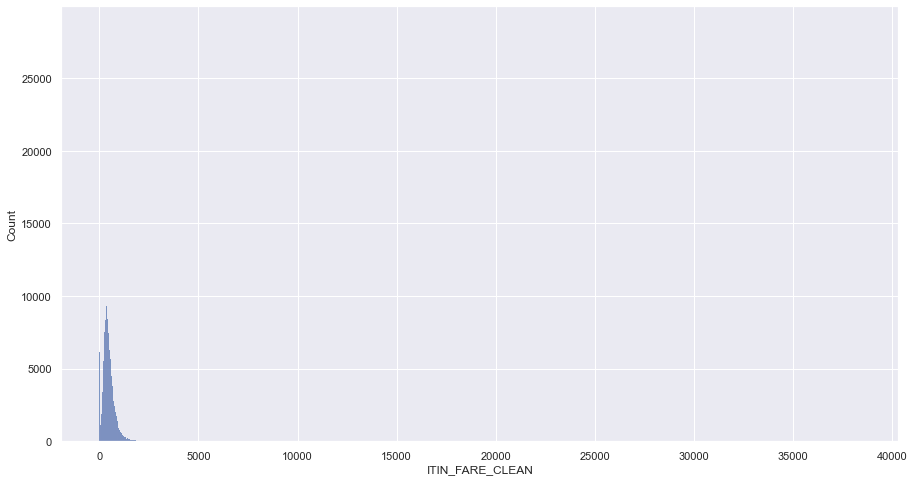

In [182]:
sns.histplot(tickets['ITIN_FARE_CLEAN'])

#### Removing the outliers in the tickets data

Based on the graph, we can see that the there are outliers present in the fares. We will remove the bottom and top 0.5% records and work with 99% of the data

In [183]:
tickets = tickets[(tickets['ITIN_FARE_CLEAN'] <= tickets['ITIN_FARE_CLEAN'].quantile(0.995)) & 
                  (tickets['ITIN_FARE_CLEAN'] > tickets['ITIN_FARE_CLEAN'].quantile(0.005))]

<AxesSubplot:xlabel='ITIN_FARE_CLEAN', ylabel='Count'>

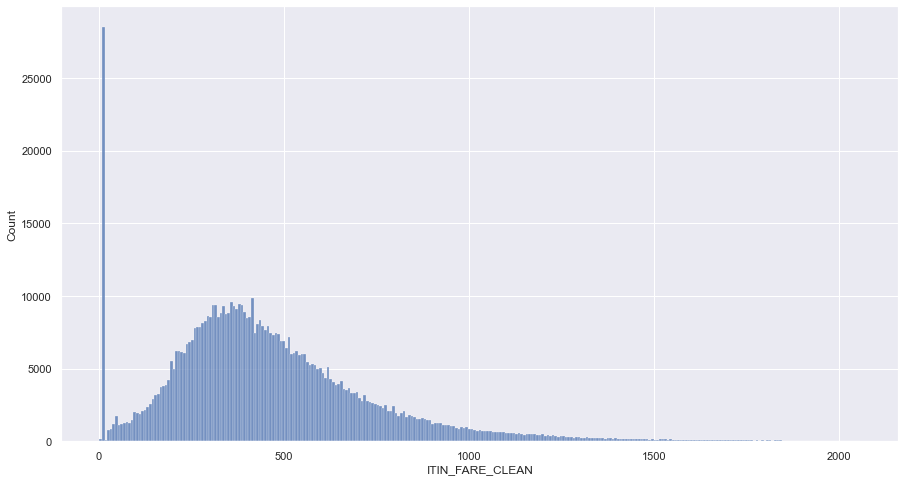

In [184]:
# Plotting the ITIN_FARE_CLEAN with no outliers
sns.histplot(tickets['ITIN_FARE_CLEAN'])

<AxesSubplot:xlabel='REPORTING_CARRIER', ylabel='ITIN_FARE_CLEAN'>

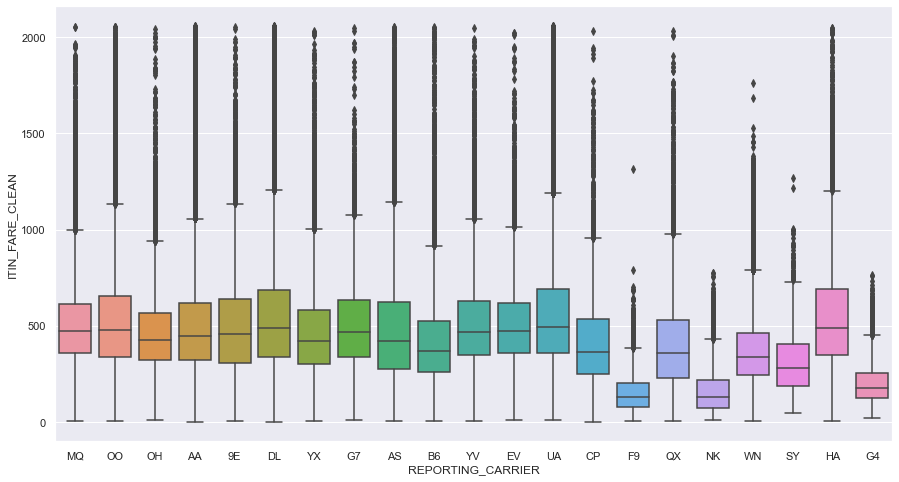

In [185]:
# Understand relationship between different carriers and the respective fare
sns.boxplot(x = tickets['REPORTING_CARRIER'],
            y = tickets['ITIN_FARE_CLEAN'])

#### We can see that the fares on average cost ~500 USD. With most of the airlines charging roughly the same amount for a roundtrip

In [186]:
# Displaying the first 5 rows of tickets with all the columns in the merged ticket dataset
tickets.head().T

0             1             2             3  \
ITIN_ID            201912723049  201912723465  201912723049  201912723465   
YEAR                       2019          2019          2019          2019   
QUARTER                       1             1             1             1   
ORIGIN                      ABI           ABI           ABI           ABI   
ORIGIN_COUNTRY               US            US            US            US   
ORIGIN_STATE_ABR             TX            TX            TX            TX   
ORIGIN_STATE_NM           Texas         Texas         Texas         Texas   
ROUNDTRIP                   1.0           1.0           1.0           1.0   
REPORTING_CARRIER            MQ            MQ            MQ            MQ   
PASSENGERS                  1.0           1.0           1.0           1.0   
ITIN_FARE                 736.0         587.0         736.0         587.0   
DESTINATION                 DAB           DAB           DAB           DAB   
IS_CLEAN_FARE                 1             1             1             1   
TRIP                    ABI-DAB       ABI-DAB       ABI-DAB       ABI-DAB   
AVG_FARE                  661.5         661.5         661.5         661.5   
ITIN_FARE_CLEAN           736.0         587.0         736.0         587.0   

                              4  
ITIN_ID            201913102001  
YEAR                       2019  
QUARTER                       1  
ORIGIN                      ABR  
ORIGIN_COUNTRY               US  
ORIGIN_STATE_ABR             SD  
ORIGIN_STATE_NM    South Dakota  
ROUNDTRIP                   1.0  
REPORTING_CARRIER            OO  
PASSENGERS                  1.0  
ITIN_FARE                 800.0  
DESTINATION                 DAB  
IS_CLEAN_FARE                 1  
TRIP                    ABR-DAB  
AVG_FARE                  800.0  
ITIN_FARE_CLEAN           800.0

## Exploring the Flights Data

In [264]:
# From the data dictionary we see that 'FL_DATE' is a date column and hence we parse it into a datetype object 
# while loading the dataset
flights = pd.read_csv('Flights.csv', parse_dates=['FL_DATE'])

#### Size of the data

In [265]:
flights.shape

(1915886, 16)

We have data corresponding to ~1.9 million flights

#### Sample of the data

In [266]:
flights.head().T

0                    1  \
FL_DATE            2019-03-02 00:00:00  2019-03-02 00:00:00   
OP_CARRIER                          WN                   WN   
TAIL_NUM                        N955WN               N8686A   
OP_CARRIER_FL_NUM                 4591                 3231   
ORIGIN_AIRPORT_ID                14635                14635   
ORIGIN                             RSW                  RSW   
ORIGIN_CITY_NAME        Fort Myers, FL       Fort Myers, FL   
DEST_AIRPORT_ID                  11042                11066   
DESTINATION                        CLE                  CMH   
DEST_CITY_NAME           Cleveland, OH         Columbus, OH   
DEP_DELAY                         -8.0                  1.0   
ARR_DELAY                         -6.0                  5.0   
CANCELLED                          0.0                  0.0   
AIR_TIME                         143.0                135.0   
DISTANCE                        1025.0                930.0   
OCCUPANCY_RATE                    0.97                 0.55   

                                     2                    3  \
FL_DATE            2019-03-02 00:00:00  2019-03-02 00:00:00   
OP_CARRIER                          WN                   WN   
TAIL_NUM                        N201LV               N413WN   
OP_CARRIER_FL_NUM                 3383                 5498   
ORIGIN_AIRPORT_ID                14635                14635   
ORIGIN                             RSW                  RSW   
ORIGIN_CITY_NAME        Fort Myers, FL       Fort Myers, FL   
DEST_AIRPORT_ID                  11066                11066   
DESTINATION                        CMH                  CMH   
DEST_CITY_NAME            Columbus, OH         Columbus, OH   
DEP_DELAY                          0.0                 11.0   
ARR_DELAY                          4.0                 14.0   
CANCELLED                          0.0                  0.0   
AIR_TIME                         132.0                136.0   
DISTANCE                         930.0                930.0   
OCCUPANCY_RATE                    0.91                 0.67   

                                     4  
FL_DATE            2019-03-02 00:00:00  
OP_CARRIER                          WN  
TAIL_NUM                        N7832A  
OP_CARRIER_FL_NUM                 6933  
ORIGIN_AIRPORT_ID                14635  
ORIGIN                             RSW  
ORIGIN_CITY_NAME        Fort Myers, FL  
DEST_AIRPORT_ID                  11259  
DESTINATION                        DAL  
DEST_CITY_NAME              Dallas, TX  
DEP_DELAY                          0.0  
ARR_DELAY                        -17.0  
CANCELLED                          0.0  
AIR_TIME                         151.0  
DISTANCE                        1005.0  
OCCUPANCY_RATE                    0.62

The columns ORIGIN and DESTINATION corresponds to the IATA codes assigned to the aiports. We will use these columns to filter the data for Domestic US based flights

#### Checking the data types and missing value counts

In [267]:
flights.dtypes

FL_DATE              datetime64[ns]
OP_CARRIER                   object
TAIL_NUM                     object
OP_CARRIER_FL_NUM            object
ORIGIN_AIRPORT_ID             int64
ORIGIN                       object
ORIGIN_CITY_NAME             object
DEST_AIRPORT_ID               int64
DESTINATION                  object
DEST_CITY_NAME               object
DEP_DELAY                   float64
ARR_DELAY                   float64
CANCELLED                   float64
AIR_TIME                     object
DISTANCE                     object
OCCUPANCY_RATE              float64
dtype: object

#### Data Quality Issue:

**AIR_TIME** and **DISTANCE** needs to be in float/int format. Besides that, the rest of the columns looks appropriate

<AxesSubplot:>

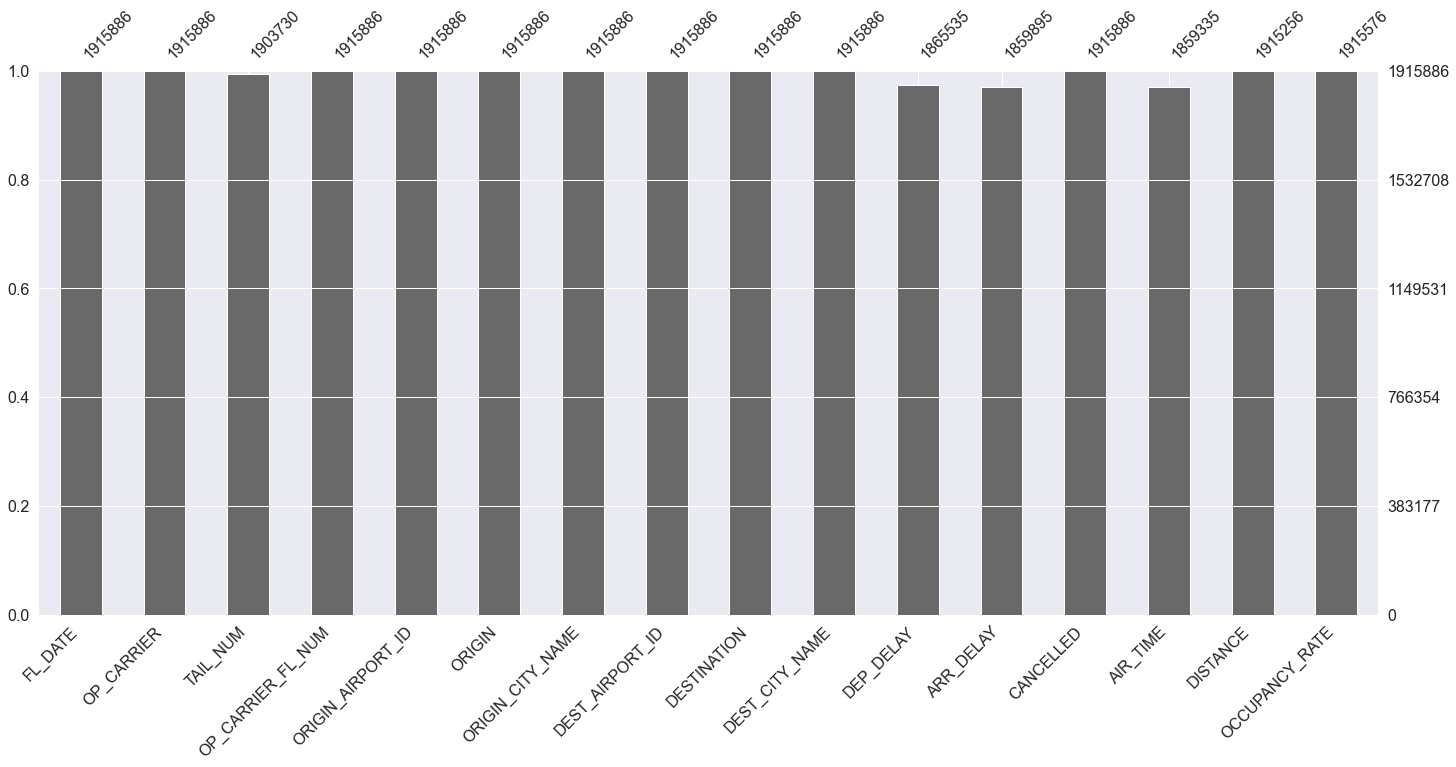

In [268]:
flights.isna().sum()
msno.bar(flights)

There is no null data in ORIGIN, DESTINATION (IATA CODES) and CANCELLED column. Hence, we do not need to do data imputation before filtering the data for further analysis

#### Checking the distribution of cancelled flights

In [269]:
flights['CANCELLED'].value_counts()

0.0    1864272
1.0      51614
Name: CANCELLED, dtype: int64

Out of ~1.9 million flights, ~51.6K flights have been cancelled. We ignore the cancelled flights and use the remaining set to filter for US based domestic flights

#### Filtering the CANCELLED flights

In [270]:
flights = flights[flights['CANCELLED'] != 1.0]
flights.shape

(1864272, 16)

#### FILTERING the ORIGIN and DESTINATION and MERGING the AIRPORT data

We are interested in domestic US Flights Market. Hence, we will filter the **ORIGIN** and the **DESTINATION** column by US IATA codes we identified in the airport data analysis.

In [271]:
# Merging the tickets with the US_airport_subset data to include all IATA CODES for both ORIGIN and DESTINATION in the flights dataset
flights = pd.merge(flights,
                   US_airport_subset['IATA_CODE'],
                   left_on = 'ORIGIN',
                   right_on = 'IATA_CODE',
                   how = 'inner')

flights.drop(['IATA_CODE'], axis = 1, inplace=True)

flights = pd.merge(flights,
                   US_airport_subset['IATA_CODE'],
                   left_on = 'DESTINATION',
                   right_on = 'IATA_CODE',
                   how = 'inner')

flights.drop(['IATA_CODE'], axis = 1, inplace=True)

In [272]:
# Shape of the flighta dataset
flights.shape

(1832457, 16)

### Pre-processing and cleaning the flights data

We define the same column 'TRIP' as we defined above to identify a journey

In [273]:
flights['TRIP'] = flights['ORIGIN'] + '-' + flights['DESTINATION']

#### Dtype Correction

In [274]:
# Applying the clean function to the DISTANCE and AIR_TIME columsn in the flights data set and cast it to float
flights['DISTANCE'] = flights['DISTANCE'].apply(lambda x: clean_value(x))
flights['AIR_TIME'] = flights['AIR_TIME'].apply(lambda x: clean_value(x))

In [275]:
flights['DISTANCE'] = flights['DISTANCE'].replace('',np.nan).astype('float64')
flights['AIR_TIME'] = flights['AIR_TIME'].replace('',np.nan).astype('float64')

**Checking for missing values in the filtered data. We will impute the missing data using average/median statistics for the corresponding round trip**

In [276]:
flights.isna().sum()

FL_DATE                 0
OP_CARRIER              0
TAIL_NUM                0
OP_CARRIER_FL_NUM       0
ORIGIN_AIRPORT_ID       0
ORIGIN                  0
ORIGIN_CITY_NAME        0
DEST_AIRPORT_ID         0
DESTINATION             0
DEST_CITY_NAME          0
DEP_DELAY               0
ARR_DELAY            4271
CANCELLED               0
AIR_TIME             6751
DISTANCE             2680
OCCUPANCY_RATE        310
TRIP                    0
dtype: int64

In [277]:
flights[['DEP_DELAY','ARR_DELAY','AIR_TIME','DISTANCE','OCCUPANCY_RATE']].describe()

DEP_DELAY     ARR_DELAY      AIR_TIME      DISTANCE  OCCUPANCY_RATE
count  1.832457e+06  1.828186e+06  1.825706e+06  1.829777e+06    1.832147e+06
mean   1.073717e+01  5.599560e+00  1.089676e+02  7.685074e+02    6.502279e-01
std    4.984298e+01  5.219427e+01  7.036551e+01  5.813784e+02    2.020018e-01
min   -6.300000e+01 -9.400000e+01  1.000000e+00  2.000000e+00    3.000000e-01
25%   -6.000000e+00 -1.500000e+01  5.900000e+01  3.440000e+02    4.800000e-01
50%   -2.000000e+00 -6.000000e+00  9.000000e+01  6.060000e+02    6.500000e-01
75%    7.000000e+00  8.000000e+00  1.380000e+02  1.005000e+03    8.247386e-01
max    2.941000e+03  2.923000e+03  2.222000e+03  9.898000e+03    1.000000e+00

#### Outlier Detection

<AxesSubplot:xlabel='AIR_TIME', ylabel='Count'>

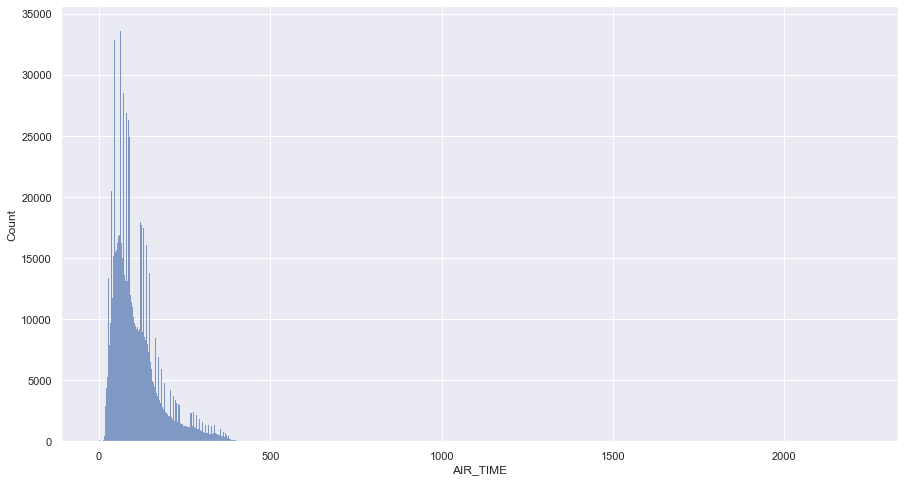

In [278]:
sns.histplot(flights['AIR_TIME'])

In [279]:
flights[flights['AIR_TIME'] >= 500].shape

(890, 17)

<AxesSubplot:xlabel='ARR_DELAY', ylabel='Count'>

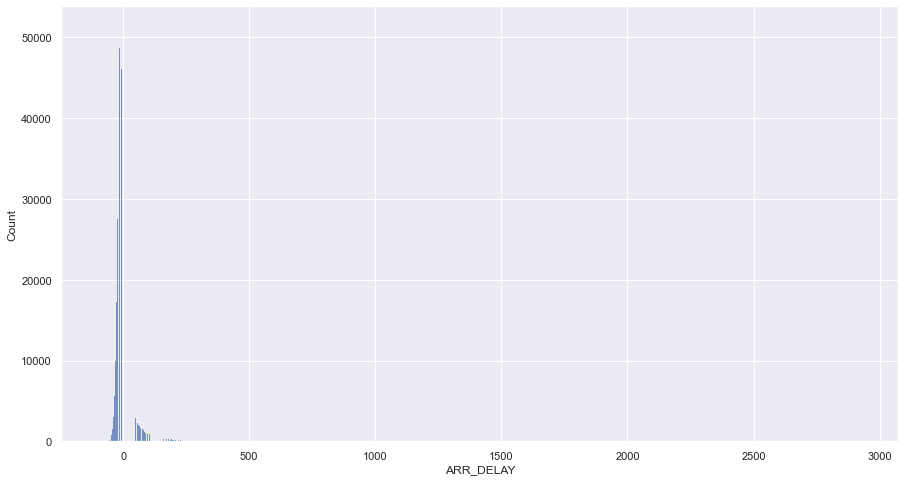

In [280]:
sns.histplot(flights['ARR_DELAY'])

In [281]:
flights[flights['ARR_DELAY'] >= 500].shape

(2681, 17)

<AxesSubplot:xlabel='DEP_DELAY', ylabel='Count'>

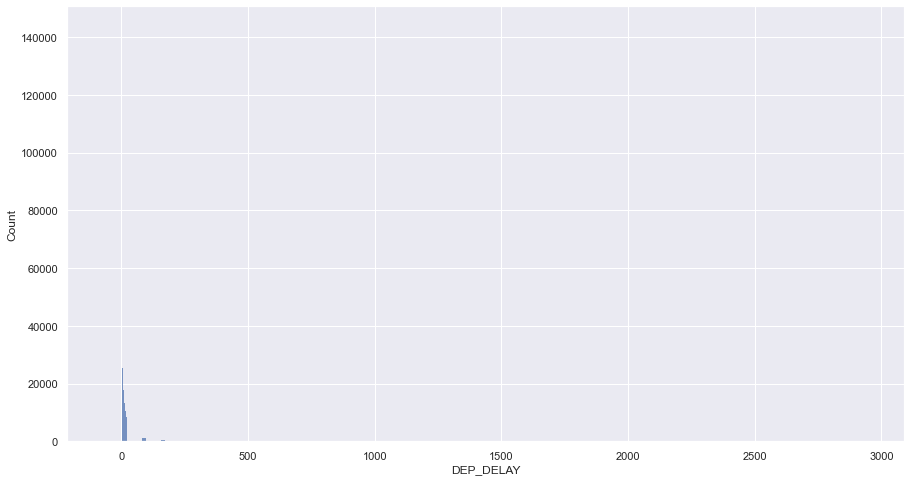

In [282]:
sns.histplot(flights['DEP_DELAY'])

In [283]:
flights[flights['DEP_DELAY'] >= 500].shape

(2723, 17)

<AxesSubplot:xlabel='DISTANCE', ylabel='Count'>

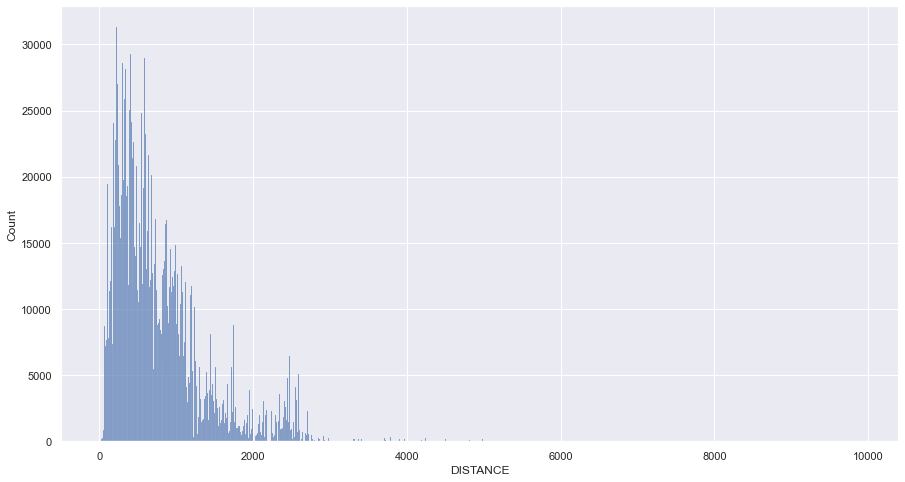

In [284]:
sns.histplot(flights['DISTANCE'])

In [285]:
flights[flights['DISTANCE'] >= 5000].shape

(30, 17)

<AxesSubplot:xlabel='OCCUPANCY_RATE', ylabel='Count'>

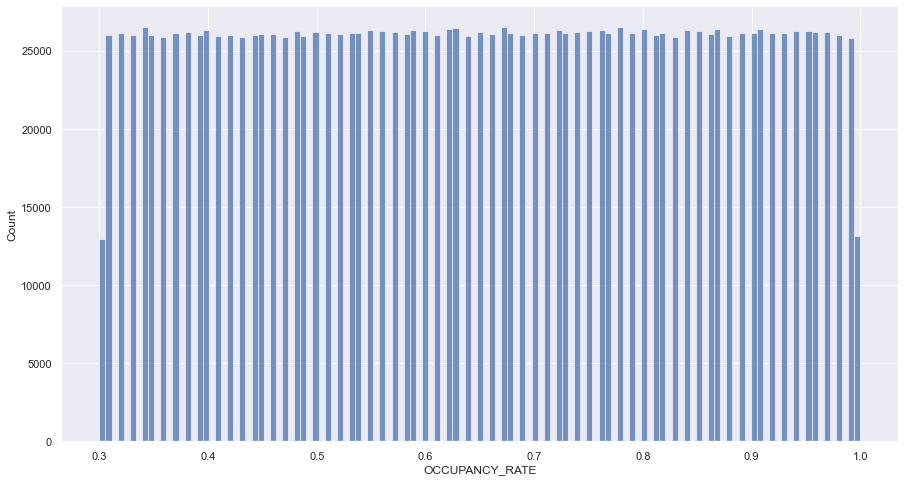

In [286]:
sns.histplot(flights['OCCUPANCY_RATE'])

#### Removing outliers

We remove outliers based on the graphs above. We define the cut off value for arrival and departure delays at 500 minutes, air time at 500 minutes and distance at 5000 miles

In [287]:
print(f"Number of records before removing outliers: {flights.shape[0]}")
flights = flights[(flights['DEP_DELAY'] <= 500) &
                  (flights['ARR_DELAY'] <= 500) &
                  (flights['DISTANCE'] <= 5000) & 
                  (flights['AIR_TIME'] <= 500)]
print(f"Number of records after removing outliers: {flights.shape[0]}")

Number of records before removing outliers: 1832457
Number of records after removing outliers: 1820036


#### Missing value treatment

Besides, OCCUPANCY_RATE, all other columns are right skewed. Hence, we take median of these dsitrbutions by each trip and then impute the null values 

In [288]:
avg_flights_stat = flights.groupby('TRIP')['ARR_DELAY','AIR_TIME','DISTANCE','OCCUPANCY_RATE'].median().reset_index()
avg_flights_stat.head().T

0        1        2        3        4
TRIP            ABE-ATL  ABE-CLT  ABE-DTW  ABE-FLL  ABE-ORD
ARR_DELAY          -6.0     -3.0     -7.5      1.0    -10.0
AIR_TIME          106.0     99.0     83.0    147.0    111.0
DISTANCE          692.0    481.0    425.0   1041.0    654.0
OCCUPANCY_RATE     0.62     0.67     0.63     0.53     0.69

#### Checking for missing values in the aggregare data

In [289]:
avg_flights_stat.isna().sum()

TRIP              0
ARR_DELAY         0
AIR_TIME          0
DISTANCE          0
OCCUPANCY_RATE    0
dtype: int64

**Imputing the missing aggregate data using the average behavior of the all trips**

In [290]:
avg_flights_stat['ARR_DELAY'] = avg_flights_stat['ARR_DELAY'].fillna(avg_flights_stat['ARR_DELAY'].mean())
avg_flights_stat['AIR_TIME'] = avg_flights_stat['AIR_TIME'].fillna(avg_flights_stat['AIR_TIME'].mean())

In [291]:
avg_flights_stat.rename(columns={'ARR_DELAY':'MEDIAN_ARR_DELAY',
                                 'AIR_TIME':'MEDIAN_AIR_TIME',
                                 'DISTANCE':'MEDIAN_DISTANCE',
                                 'OCCUPANCY_RATE':'MEDIAN_OCCUPANCY_RATE'},
                        inplace=True)

In [292]:
flights = pd.merge(flights,
                   avg_flights_stat,
                   on = 'TRIP',
                   how = 'inner')

**Imputing the missing values with the median value for the corresponding trip**

In [293]:
flights['ARR_DELAY'] = np.where(flights['ARR_DELAY'].isna(),
                                flights['MEDIAN_ARR_DELAY'],
                                flights['ARR_DELAY'])

flights['AIR_TIME'] = np.where(flights['AIR_TIME'].isna(),
                               flights['MEDIAN_AIR_TIME'],
                               flights['AIR_TIME'])

flights['DISTANCE'] = np.where(flights['DISTANCE'].isna(),
                               flights['MEDIAN_DISTANCE'],
                               flights['DISTANCE'])

flights['OCCUPANCY_RATE'] = np.where(flights['OCCUPANCY_RATE'].isna(),
                                     flights['MEDIAN_OCCUPANCY_RATE'],
                                     flights['OCCUPANCY_RATE'])

In [294]:
# Check for missing values
flights.isna().sum()

FL_DATE                  0
OP_CARRIER               0
TAIL_NUM                 0
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
ORIGIN_CITY_NAME         0
DEST_AIRPORT_ID          0
DESTINATION              0
DEST_CITY_NAME           0
DEP_DELAY                0
ARR_DELAY                0
CANCELLED                0
AIR_TIME                 0
DISTANCE                 0
OCCUPANCY_RATE           0
TRIP                     0
MEDIAN_ARR_DELAY         0
MEDIAN_AIR_TIME          0
MEDIAN_DISTANCE          0
MEDIAN_OCCUPANCY_RATE    0
dtype: int64

<AxesSubplot:xlabel='OP_CARRIER', ylabel='DISTANCE'>

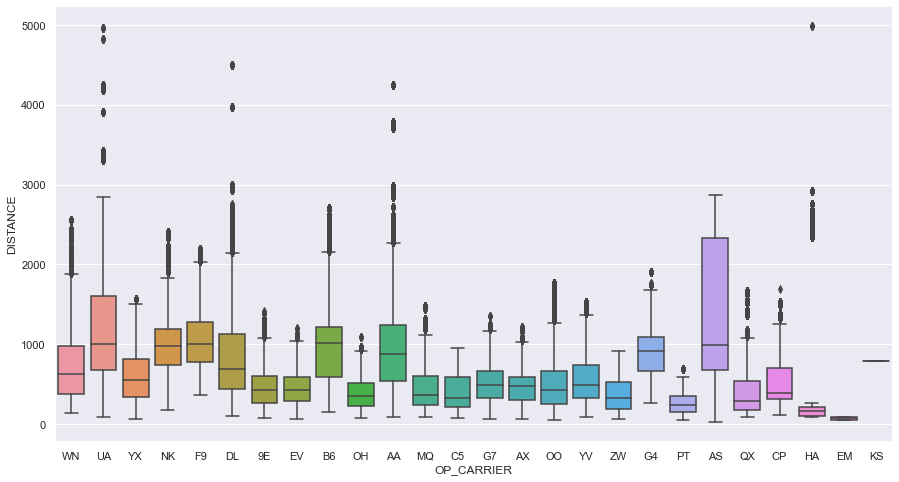

In [295]:
sns.boxplot(x = flights['OP_CARRIER'],
            y = flights['DISTANCE'])

Most airlines operate under 3000 miles flight distance, with an exception of United Airlines, Delta Airlines, American Airlines and Hawaian Airlines

<AxesSubplot:xlabel='OP_CARRIER', ylabel='DEP_DELAY'>

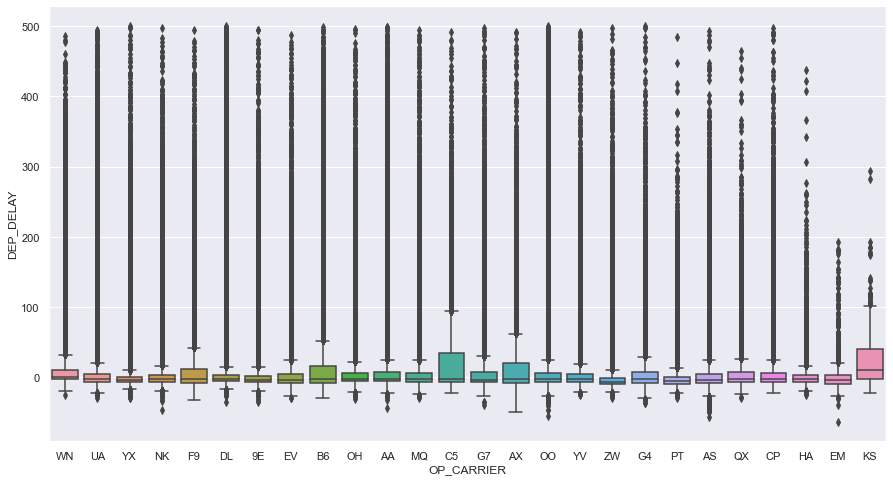

In [296]:
sns.boxplot(x = flights['OP_CARRIER'],
            y = flights['DEP_DELAY'])

<AxesSubplot:xlabel='OP_CARRIER', ylabel='ARR_DELAY'>

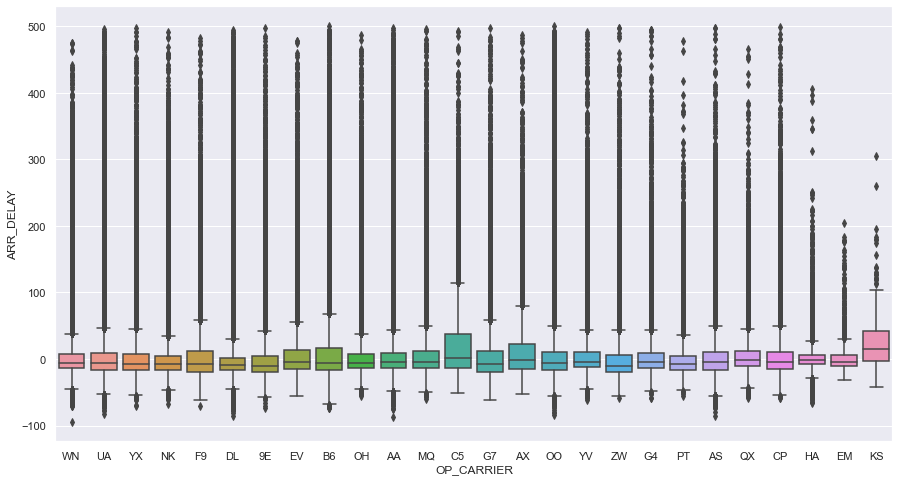

In [297]:
sns.boxplot(x = flights['OP_CARRIER'],
            y = flights['ARR_DELAY'])

We can see from the above box plots that not many carriers have either an arrival or departure delay. 

# Defining the Metrics

## Calculating the cost

### Adding base costs to the airport data

In [298]:
US_airport_subset.head()

TYPE                                 NAME  ELEVATION_FT  \
6194   medium_airport              Aleknagik / New Airport          66.0   
26143  medium_airport  Lehigh Valley International Airport         393.0   
26144  medium_airport             Abilene Regional Airport        1791.0   
26145   large_airport    Albuquerque International Sunport        5355.0   
26146  medium_airport            Aberdeen Regional Airport        1302.0   

      CONTINENT ISO_COUNTRY MUNICIPALITY IATA_CODE  \
6194        NaN          US    Aleknagik       WKK   
26143       NaN          US    Allentown       ABE   
26144       NaN          US      Abilene       ABI   
26145       NaN          US  Albuquerque       ABQ   
26146       NaN          US     Aberdeen       ABR   

                                  COORDINATES   COST         LAT       LONG  
6194            -158.617996216, 59.2826004028   5000 -158.617996  59.282600  
26143     -75.44080352783203, 40.652099609375   5000  -75.440804  40.652100  
26144       -99.68190002440001, 32.4113006592   5000  -99.681900  32.411301  
26145                  -106.609001, 35.040199  10000 -106.609001  35.040199  
26146  -98.42179870605469, 45.449100494384766   5000  -98.421799  45.449100

**We define columns 'COST','LAT' & 'LONG' which corresponds to the usage charges for the airport and the latitute and the longitude**

In [299]:
US_airport_subset['COST'] = np.where(US_airport_subset['TYPE'] == 'medium_airport', 5000, 10000)
US_airport_subset['LAT'] = US_airport_subset['COORDINATES'].apply(lambda x: float(x.split(',')[0]))
US_airport_subset['LONG'] = US_airport_subset['COORDINATES'].apply(lambda x: float(x.split(',')[1]))

### Adding late cost and misc cost to the flights data

In [300]:
flights.head().T

0                    1  \
FL_DATE                2019-03-02 00:00:00  2019-03-09 00:00:00   
OP_CARRIER                              WN                   WN   
TAIL_NUM                            N955WN               N754SW   
OP_CARRIER_FL_NUM                     4591                 3016   
ORIGIN_AIRPORT_ID                    14635                14635   
ORIGIN                                 RSW                  RSW   
ORIGIN_CITY_NAME            Fort Myers, FL       Fort Myers, FL   
DEST_AIRPORT_ID                      11042                11042   
DESTINATION                            CLE                  CLE   
DEST_CITY_NAME               Cleveland, OH        Cleveland, OH   
DEP_DELAY                             -8.0                 -7.0   
ARR_DELAY                             -6.0                -22.0   
CANCELLED                              0.0                  0.0   
AIR_TIME                             143.0                137.0   
DISTANCE                            1025.0               1025.0   
OCCUPANCY_RATE                        0.97                 0.63   
TRIP                               RSW-CLE              RSW-CLE   
MEDIAN_ARR_DELAY                      -7.0                 -7.0   
MEDIAN_AIR_TIME                      134.5                134.5   
MEDIAN_DISTANCE                     1025.0               1025.0   
MEDIAN_OCCUPANCY_RATE                 0.65                 0.65   

                                         2                    3  \
FL_DATE                2019-03-24 00:00:00  2019-03-11 00:00:00   
OP_CARRIER                              UA                   UA   
TAIL_NUM                            N14249               N14240   
OP_CARRIER_FL_NUM                     2350                 2350   
ORIGIN_AIRPORT_ID                    14635                14635   
ORIGIN                                 RSW                  RSW   
ORIGIN_CITY_NAME            Fort Myers, FL       Fort Myers, FL   
DEST_AIRPORT_ID                      11042                11042   
DESTINATION                            CLE                  CLE   
DEST_CITY_NAME               Cleveland, OH        Cleveland, OH   
DEP_DELAY                            -16.0                 -1.0   
ARR_DELAY                             -9.0                  8.0   
CANCELLED                              0.0                  0.0   
AIR_TIME                             129.0                138.0   
DISTANCE                            1025.0               1025.0   
OCCUPANCY_RATE                        0.98                 0.36   
TRIP                               RSW-CLE              RSW-CLE   
MEDIAN_ARR_DELAY                      -7.0                 -7.0   
MEDIAN_AIR_TIME                      134.5                134.5   
MEDIAN_DISTANCE                     1025.0               1025.0   
MEDIAN_OCCUPANCY_RATE                 0.65                 0.65   

                                         4  
FL_DATE                2019-03-10 00:00:00  
OP_CARRIER                              UA  
TAIL_NUM                            N11206  
OP_CARRIER_FL_NUM                     2350  
ORIGIN_AIRPORT_ID                    14635  
ORIGIN                                 RSW  
ORIGIN_CITY_NAME            Fort Myers, FL  
DEST_AIRPORT_ID                      11042  
DESTINATION                            CLE  
DEST_CITY_NAME               Cleveland, OH  
DEP_DELAY                             -6.0  
ARR_DELAY                              1.0  
CANCELLED                              0.0  
AIR_TIME                             141.0  
DISTANCE                            1025.0  
OCCUPANCY_RATE                        0.45  
TRIP                               RSW-CLE  
MEDIAN_ARR_DELAY                      -7.0  
MEDIAN_AIR_TIME                      134.5  
MEDIAN_DISTANCE                     1025.0  
MEDIAN_OCCUPANCY_RATE                 0.65

**Defining COSTS associated to operating a flight**  
  
**MISC COST:** 8 USD per mile (Fuel, Oil, Maintenance, Crew) + 1.18 USD per mile (Depreciation, Insurance, Other)  
**DEP_LATE_FEES:** Late Fees charged to the airline for delay in departure. First 15 minutes delay are free. Post that 75 USD charges on each minute delay  
**ARR_LATE_FEES:** Late Fees charged to the airline for delay in arrival. First 15 minutes delay are free. Post that 75 USD charges on each minute delay  
**LATE_FEES:** DEP_LATE_FEES + ARR_LATE_FEES  

In [301]:
# $8 per mile (Fuel, Oil, Maintenance, Crew) + $1.18 per mile (Depreciation, Insurance, Other)
flights['MISC_COST'] = flights['DISTANCE'] * 9.18

In [302]:
# Flights that have an arrival of departure delay more than 15 mins are charged $75 per mintute
flights['DEP_LATE_FEES'] = np.where(flights['DEP_DELAY'] > 15, 
                                    75*np.ceil(flights['DEP_DELAY'] - 15),
                                    0)

flights['ARR_LATE_FEES'] = np.where(flights['ARR_DELAY'] > 15, 
                                    75*np.ceil(flights['ARR_DELAY'] - 15),
                                    0)

flights['LATE_FEES'] = flights['DEP_LATE_FEES'] + flights['ARR_LATE_FEES']

In [303]:
# Merging the flights dataset with the US_airport_subset with the Cost column in place
flights = pd.merge(flights,
                   US_airport_subset[['IATA_CODE','COST']],
                   left_on = 'DESTINATION',
                   right_on = 'IATA_CODE',
                   how = 'inner')
flights.drop(['IATA_CODE'], axis = 1, inplace = True)
flights.rename(columns = {'COST':'DESTINATION_COST'}, inplace = True)

In [304]:
flights[['DEP_LATE_FEES','ARR_LATE_FEES','LATE_FEES','MISC_COST']].describe()

DEP_LATE_FEES  ARR_LATE_FEES     LATE_FEES     MISC_COST
count   1.820036e+06   1.820036e+06  1.820036e+06  1.820036e+06
mean    6.868170e+02   6.989300e+02  1.385747e+03  7.033440e+03
std     2.506807e+03   2.511420e+03  4.982763e+03  5.275050e+03
min     0.000000e+00   0.000000e+00  0.000000e+00  2.845800e+02
25%     0.000000e+00   0.000000e+00  0.000000e+00  3.148740e+03
50%     0.000000e+00   0.000000e+00  0.000000e+00  5.563080e+03
75%     0.000000e+00   0.000000e+00  0.000000e+00  9.225900e+03
max     3.637500e+04   3.637500e+04  7.245000e+04  4.574394e+04

We define a new column **IS_LATE** to calculate the statistics for flights that are late

In [305]:
flights['IS_LATE'] = flights.apply(lambda row: 1 if (row['DEP_DELAY'] > 0 or row['ARR_DELAY'] > 0) else 0, axis=1)

In [306]:
flights[flights['IS_LATE'] == 1][['DEP_DELAY','DEP_LATE_FEES']].describe()

DEP_DELAY  DEP_LATE_FEES
count  815159.000000  815159.000000
mean       27.790674    1533.482026
std        51.383097    3568.244794
min       -34.000000       0.000000
25%         1.000000       0.000000
50%         9.000000       0.000000
75%        32.000000    1275.000000
max       500.000000   36375.000000

In [307]:
flights[flights['IS_LATE'] == 1][['ARR_DELAY','ARR_LATE_FEES']].describe()

ARR_DELAY  ARR_LATE_FEES
count  815159.000000  815159.000000
mean       27.871773    1560.527271
std        51.872611    3569.013243
min       -85.000000       0.000000
25%         2.000000       0.000000
50%        11.000000       0.000000
75%        34.000000    1425.000000
max       500.000000   36375.000000

#### Aggregating the flight data

In [310]:
# Aggrgating the flights dataset by each trip with the respective costs
flights_agg = flights.groupby(['ORIGIN','DESTINATION','TRIP']).agg({'FL_DATE':'count',
                                                                    'OP_CARRIER':'nunique',
                                                                    'MISC_COST':'mean',
                                                                    'ARR_DELAY':'median',
                                                                    'DEP_DELAY':'median',
                                                                    'ARR_LATE_FEES':'median',
                                                                    'DEP_LATE_FEES':'median',
                                                                    'LATE_FEES':'median',
                                                                    'DESTINATION_COST':'mean',
                                                                    'OCCUPANCY_RATE':'mean',
                                                                    'DISTANCE':'mean',
                                                                    'AIR_TIME':'mean'}).reset_index()

In [312]:
# Display the flight dataset
flights_agg.head().T

0          1          2        3           4
ORIGIN                  ABE        ABE        ABE      ABE         ABE
DESTINATION             ATL        CLT        DTW      FLL         ORD
TRIP                ABE-ATL    ABE-CLT    ABE-DTW  ABE-FLL     ABE-ORD
FL_DATE                 217        251        248       20         159
OP_CARRIER                2          1          2        1           3
MISC_COST           6352.56    4415.58     3901.5  9556.38     6003.72
ARR_DELAY              -6.0       -3.0       -7.5      1.0       -10.0
DEP_DELAY              -2.0       -6.0       -3.0      0.0        -5.0
ARR_LATE_FEES           0.0        0.0        0.0      0.0         0.0
DEP_LATE_FEES           0.0        0.0        0.0      0.0         0.0
LATE_FEES               0.0        0.0        0.0      0.0         0.0
DESTINATION_COST      10000      10000      10000    10000       10000
OCCUPANCY_RATE     0.641567   0.665976   0.639073     0.58    0.671195
DISTANCE              692.0      481.0      425.0   1041.0       654.0
AIR_TIME          107.02765  98.972112  83.431452   145.65  110.924528

In [314]:
# A function which takes into account that each trip in a round trip is different and reverses the first leg of the roundtrip to get the second leg of the roundtrip
def make_key(value):
    
    origin = value.split('-')[0]
    destination = value.split('-')[1]
    
    if origin < destination:
        ret_val = value
    else:
        ret_val = destination + '-' + origin
        
    return ret_val

In [316]:
# Applying the fucntion on a new created column called KEY
flights_agg['KEY'] = flights_agg['TRIP'].apply(lambda x: make_key(x))

In [318]:
# Merging the flights_agg dataset on itself to account for both the legs in a roundtrip

round_trip_flights = pd.merge(flights_agg,
                              flights_agg,
                              on = 'KEY',
                              how = 'inner')

In [319]:
# Removing the unnecessary duplicate data points due to self join and keeping only the ones that differ
round_trip_flights = round_trip_flights[(round_trip_flights['ORIGIN_x'] != round_trip_flights['ORIGIN_y']) &
                                        (round_trip_flights['DESTINATION_x'] != round_trip_flights['DESTINATION_y'])]

In [320]:
round_trip_flights.head()

ORIGIN_x DESTINATION_x   TRIP_x  FL_DATE_x  OP_CARRIER_x  MISC_COST_x  \
1      ABE           ATL  ABE-ATL        217             2      6352.56   
2      ATL           ABE  ATL-ABE        217             2      6352.56   
5      ABE           CLT  ABE-CLT        251             1      4415.58   
6      CLT           ABE  CLT-ABE        251             1      4415.58   
9      ABE           DTW  ABE-DTW        248             2      3901.50   

   ARR_DELAY_x  DEP_DELAY_x  ARR_LATE_FEES_x  DEP_LATE_FEES_x  LATE_FEES_x  \
1         -6.0         -2.0              0.0              0.0          0.0   
2        -10.0         -3.0              0.0              0.0          0.0   
5         -3.0         -6.0              0.0              0.0          0.0   
6         -7.0         -2.0              0.0              0.0          0.0   
9         -7.5         -3.0              0.0              0.0          0.0   

   DESTINATION_COST_x  OCCUPANCY_RATE_x  DISTANCE_x  AIR_TIME_x      KEY  \
1               10000          0.641567       692.0  107.027650  ABE-ATL   
2                5000          0.667097       692.0   92.373272  ABE-ATL   
5               10000          0.665976       481.0   98.972112  ABE-CLT   
6                5000          0.656215       481.0   72.131474  ABE-CLT   
9               10000          0.639073       425.0   83.431452  ABE-DTW   

  ORIGIN_y DESTINATION_y   TRIP_y  FL_DATE_y  OP_CARRIER_y  MISC_COST_y  \
1      ATL           ABE  ATL-ABE        217             2      6352.56   
2      ABE           ATL  ABE-ATL        217             2      6352.56   
5      CLT           ABE  CLT-ABE        251             1      4415.58   
6      ABE           CLT  ABE-CLT        251             1      4415.58   
9      DTW           ABE  DTW-ABE        248             2      3901.50   

   ARR_DELAY_y  DEP_DELAY_y  ARR_LATE_FEES_y  DEP_LATE_FEES_y  LATE_FEES_y  \
1        -10.0         -3.0              0.0              0.0          0.0   
2         -6.0         -2.0              0.0              0.0          0.0   
5         -7.0         -2.0              0.0              0.0          0.0   
6         -3.0         -6.0              0.0              0.0          0.0   
9        -11.0         -3.0              0.0              0.0          0.0   

   DESTINATION_COST_y  OCCUPANCY_RATE_y  DISTANCE_y  AIR_TIME_y  
1                5000          0.667097       692.0   92.373272  
2               10000          0.641567       692.0  107.027650  
5                5000          0.656215       481.0   72.131474  
6               10000          0.665976       481.0   98.972112  
9                5000          0.650766       425.0   60.012097

In [322]:
# Renaming all the coloumns for the final dataset as the both the legs of the roundtrip should have differnt data point nomenclature 
cols_rename={'ORIGIN_x':'ONWARD_ORIGIN',
             'DESTINATION_x':'ONWARD_DESTINATION',
             'TRIP_x':'ONWARD_TRIP',
             'FL_DATE_x':'ONWARD_COUNT',
             'OP_CARRIER_x':'ONWARD_NUM_AIRLINES',
             'MISC_COST_x':'ONWARD_MISC_COST',
             'ARR_DELAY_x':'ONWARD_ARR_DELAY',
             'DEP_DELAY_x':'ONWARD_DEP_DELAY',
             'ARR_LATE_FEES_x':'ONWARD_ARR_LATE_FEES',
             'DEP_LATE_FEES_x':'ONWARD_DEP_LATE_FEES',
             'LATE_FEES_x':'ONWARD_LATE_FEES',
             'DESTINATION_COST_x':'ONWARD_DESTINATION_COST',
             'OCCUPANCY_RATE_x':'ONWARD_OCCUPANCY_RATE',
             'DISTANCE_x':'ONWARD_DISTANCE',
             'AIR_TIME_x':'ONWARD_AIRTIME',
             'KEY':'ROUND_TRIP',
             'ORIGIN_y':'RETURN_ORIGIN',
             'DESTINATION_y':'RETURN_DESTINATION',
             'TRIP_y':'RETURN_TRIP',
             'FL_DATE_y':'RETURN_COUNT',
             'OP_CARRIER_y':'RETURN_NUM_AIRLINES',
             'MISC_COST_y':'RETURN_MISC_COST',
             'ARR_DELAY_y':'RETURN_ARR_DELAY',
             'DEP_DELAY_y':'RETURN_DEP_DELAY',
             'ARR_LATE_FEES_y':'RETURN_ARR_LATE_FEES',
             'DEP_LATE_FEES_y':'RETURN_DEP_LATE_FEES',
             'LATE_FEES_y':'RETURN_LATE_FEES',
             'DESTINATION_COST_y':'RETURN_DESTINATION_COST',
             'OCCUPANCY_RATE_y':'RETURN_OCCUPANCY_RATE',
             'DISTANCE_y':'RETURN_DISTANCE',
             'AIR_TIME_y':'RETURN_AIRTIME'}

In [323]:
round_trip_flights.rename(columns = cols_rename, inplace = True)

In [325]:
# Considering the average of few data points when considering first and second leg of the roundtrip
round_trip_flights['AVG_ARR_DELAY'] = (round_trip_flights['ONWARD_ARR_DELAY'] + \
                                       round_trip_flights['RETURN_ARR_DELAY'])/2
round_trip_flights['AVG_DEP_DELAY'] = (round_trip_flights['ONWARD_DEP_DELAY'] + \
                                       round_trip_flights['RETURN_DEP_DELAY'])/2
round_trip_flights['AVG_OCCUPANCY_RATE'] = (round_trip_flights['ONWARD_OCCUPANCY_RATE'] + \
                                       round_trip_flights['RETURN_OCCUPANCY_RATE'])/2
round_trip_flights['DISTANCE'] = (round_trip_flights['ONWARD_DISTANCE'] + \
                                       round_trip_flights['RETURN_DISTANCE'])/2
round_trip_flights['AIRTIME'] = (round_trip_flights['ONWARD_AIRTIME'] + \
                                       round_trip_flights['RETURN_AIRTIME'])/2
round_trip_flights['NUM_AIRLINES'] = (round_trip_flights['ONWARD_NUM_AIRLINES'] + \
                                       round_trip_flights['RETURN_NUM_AIRLINES'])/2
round_trip_flights['FLIGHT_COUNT'] = round_trip_flights.apply(lambda row: min(row['ONWARD_COUNT'], 
                                                                              row['RETURN_COUNT']), 
                                                              axis=1)
round_trip_flights['LATE_FEES'] = round_trip_flights['ONWARD_LATE_FEES'] + round_trip_flights['RETURN_LATE_FEES']
round_trip_flights['AIRPORT_COST'] = (round_trip_flights['ONWARD_DESTINATION_COST'] + \
                                      round_trip_flights['RETURN_DESTINATION_COST'])
round_trip_flights['MISC_COST'] = round_trip_flights['ONWARD_MISC_COST'] + round_trip_flights['RETURN_MISC_COST']
round_trip_flights['TRIP_COST'] = (round_trip_flights['LATE_FEES'] + round_trip_flights['AIRPORT_COST'] + \
                                    round_trip_flights['MISC_COST'])

In [326]:
keep_cols = ['ROUND_TRIP','FLIGHT_COUNT','NUM_AIRLINES','AVG_ARR_DELAY','AVG_DEP_DELAY','DISTANCE','AIRTIME',
             'AVG_OCCUPANCY_RATE','AIRPORT_COST','MISC_COST','LATE_FEES','TRIP_COST']
round_trips = round_trip_flights[keep_cols].drop_duplicates()

In [328]:
round_trips.head().T

1          5          9         13         17
ROUND_TRIP            ABE-ATL    ABE-CLT    ABE-DTW   ABE-FLL    ABE-ORD
FLIGHT_COUNT              217        251        248        20        159
NUM_AIRLINES              2.0        1.0        2.0       1.0        3.0
AVG_ARR_DELAY            -8.0       -5.0      -9.25      0.25       -4.5
AVG_DEP_DELAY            -2.5       -4.0       -3.0     -1.25       -3.0
DISTANCE                692.0      481.0      425.0    1041.0      654.0
AIRTIME             99.700461  85.551793  71.721774   147.425  96.531447
AVG_OCCUPANCY_RATE   0.654332   0.661096   0.644919   0.60525   0.649434
AIRPORT_COST            15000      15000      15000     15000      15000
MISC_COST            12705.12    8831.16     7803.0  19112.76   12007.44
LATE_FEES                 0.0        0.0        0.0       0.0        0.0
TRIP_COST            27705.12   23831.16    22803.0  34112.76   27007.44

#### Outlier Detection

<AxesSubplot:xlabel='MISC_COST', ylabel='Count'>

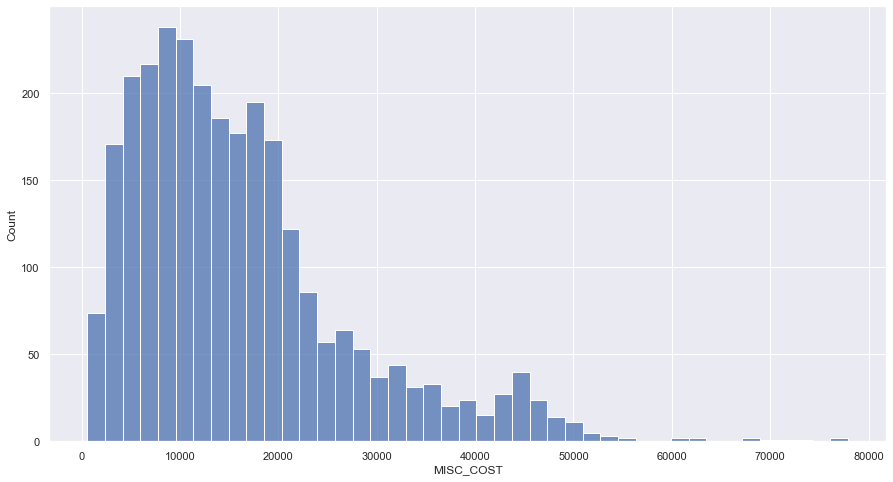

In [329]:
sns.histplot(round_trips['MISC_COST'])

<AxesSubplot:xlabel='TRIP_COST', ylabel='Count'>

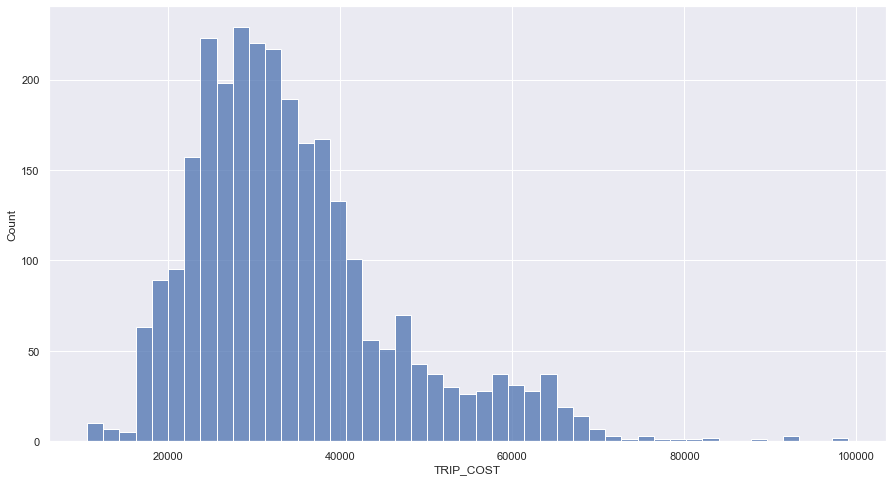

In [330]:
sns.histplot(round_trips['TRIP_COST'])

**On average it costs ~10,000 USD in Miscellenous expenses, ~15000 USD in Airport Charges and ~30000 USD for overall ROUND TRIP expense. This amount is directly proportional to the distance between the two airports**

## Revenue Metrics

In [331]:
# Display the tickets dataset
tickets.head().T

0             1             2             3  \
ITIN_ID            201912723049  201912723465  201912723049  201912723465   
YEAR                       2019          2019          2019          2019   
QUARTER                       1             1             1             1   
ORIGIN                      ABI           ABI           ABI           ABI   
ORIGIN_COUNTRY               US            US            US            US   
ORIGIN_STATE_ABR             TX            TX            TX            TX   
ORIGIN_STATE_NM           Texas         Texas         Texas         Texas   
ROUNDTRIP                   1.0           1.0           1.0           1.0   
REPORTING_CARRIER            MQ            MQ            MQ            MQ   
PASSENGERS                  1.0           1.0           1.0           1.0   
ITIN_FARE                 736.0         587.0         736.0         587.0   
DESTINATION                 DAB           DAB           DAB           DAB   
IS_CLEAN_FARE                 1             1             1             1   
TRIP                    ABI-DAB       ABI-DAB       ABI-DAB       ABI-DAB   
AVG_FARE                  661.5         661.5         661.5         661.5   
ITIN_FARE_CLEAN           736.0         587.0         736.0         587.0   

                              4  
ITIN_ID            201913102001  
YEAR                       2019  
QUARTER                       1  
ORIGIN                      ABR  
ORIGIN_COUNTRY               US  
ORIGIN_STATE_ABR             SD  
ORIGIN_STATE_NM    South Dakota  
ROUNDTRIP                   1.0  
REPORTING_CARRIER            OO  
PASSENGERS                  1.0  
ITIN_FARE                 800.0  
DESTINATION                 DAB  
IS_CLEAN_FARE                 1  
TRIP                    ABR-DAB  
AVG_FARE                  800.0  
ITIN_FARE_CLEAN           800.0

In [332]:
tickets[['PASSENGERS','ITIN_FARE_CLEAN']].describe()

PASSENGERS  ITIN_FARE_CLEAN
count  673604.000000    674754.000000
mean        1.937065       465.109607
std         4.989575       284.186425
min         1.000000         1.000000
25%         1.000000       284.000000
50%         1.000000       417.000000
75%         1.000000       594.000000
max       681.000000      2058.000000

In [335]:
# Applying the fucntion on a new created column called KEY
tickets['ROUND_TRIP'] = tickets['TRIP'].apply(lambda x: make_key(x))

In [338]:
# Calculating the mean of fare for each trip and renaming the fare column to fare per passenger 
tickets_agg = tickets.groupby('ROUND_TRIP').agg({'ITIN_FARE_CLEAN':'mean'}).reset_index()
tickets_agg.rename(columns={'ITIN_FARE_CLEAN':'FARE_PER_PASSENGER'},inplace = True)

In [339]:
tickets_agg.head()

ROUND_TRIP  FARE_PER_PASSENGER
0    ABE-ABI               758.0
1    ABE-ABQ               534.0
2    ABE-AGS               391.0
3    ABE-AMA               654.0
4    ABE-ASE               742.0

In [340]:
tickets_agg.shape

(23901, 2)

### Data Munging

In [341]:
trip_data = pd.merge(round_trips,
                     tickets_agg,
                     on = 'ROUND_TRIP',
                     how = 'inner')

In [342]:
trip_data.shape

(2771, 13)

In [343]:
trip_data.head().T

0           1           2           3           4
ROUND_TRIP             ABE-ATL     ABE-CLT     ABE-DTW     ABE-FLL     ABE-ORD
FLIGHT_COUNT               217         251         248          20         159
NUM_AIRLINES               2.0         1.0         2.0         1.0         3.0
AVG_ARR_DELAY             -8.0        -5.0       -9.25        0.25        -4.5
AVG_DEP_DELAY             -2.5        -4.0        -3.0       -1.25        -3.0
DISTANCE                 692.0       481.0       425.0      1041.0       654.0
AIRTIME              99.700461   85.551793   71.721774     147.425   96.531447
AVG_OCCUPANCY_RATE    0.654332    0.661096    0.644919     0.60525    0.649434
AIRPORT_COST             15000       15000       15000       15000       15000
MISC_COST             12705.12     8831.16      7803.0    19112.76    12007.44
LATE_FEES                  0.0         0.0         0.0         0.0         0.0
TRIP_COST             27705.12    23831.16     22803.0    34112.76    27007.44
FARE_PER_PASSENGER  557.141176  486.394737  426.421053  248.734375  566.633333

In [344]:
# Defining revenue metrics
trip_data['NUM_PASSENGERS'] = np.ceil(trip_data['AVG_OCCUPANCY_RATE'] * 400)
trip_data['BASE_REVENUE'] = trip_data['NUM_PASSENGERS'] * trip_data['FARE_PER_PASSENGER']
trip_data['LUGGAGE_REVENUE'] = trip_data['NUM_PASSENGERS'] * 70/2
trip_data['TRIP_REVENUE'] = trip_data['BASE_REVENUE'] + trip_data['LUGGAGE_REVENUE']
trip_data['TRIP_PROFIT'] = trip_data['TRIP_REVENUE'] - trip_data['TRIP_COST']

In [348]:
# Defining Profit Metrics
trip_data['TOTAL_PROFIT'] = trip_data['FLIGHT_COUNT'] * trip_data['TRIP_PROFIT']
trip_data['TOTAL_COST'] = trip_data['FLIGHT_COUNT'] * trip_data['TRIP_COST']
trip_data['TOTAL_REVENUE'] = trip_data['FLIGHT_COUNT'] * trip_data['TRIP_REVENUE']

#### Outlier Detection

<AxesSubplot:xlabel='TRIP_REVENUE', ylabel='Count'>

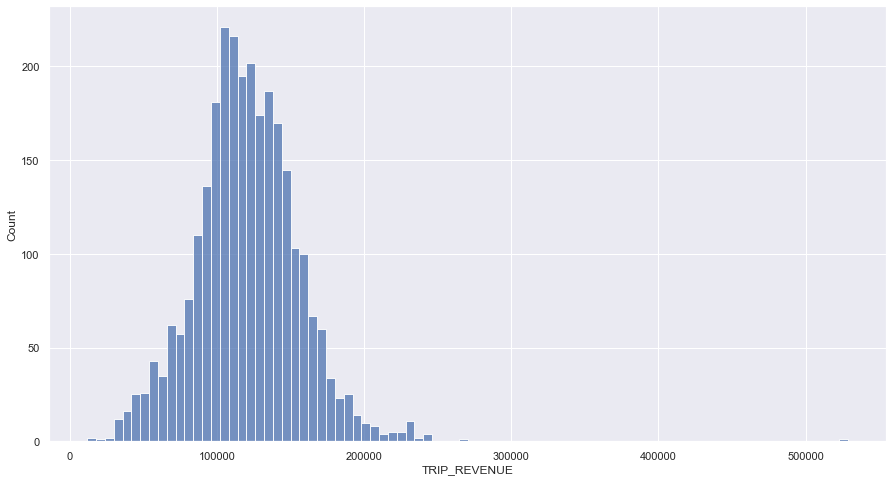

In [349]:
sns.histplot(trip_data['TRIP_REVENUE'])

<AxesSubplot:xlabel='TRIP_PROFIT', ylabel='Count'>

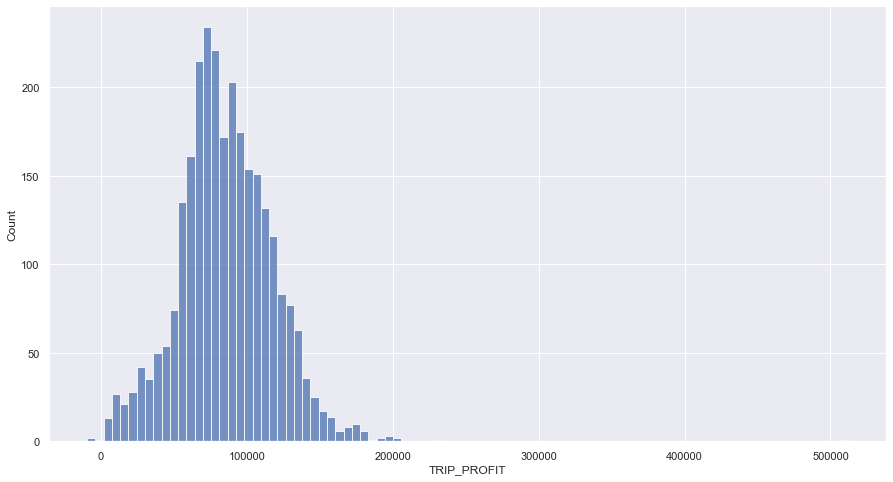

In [350]:
sns.histplot(trip_data['TRIP_PROFIT'])

In [351]:
# Getting the average statistics at ROUTE-LEVEL
trip_data['AVG_PROFIT'] = trip_data['TOTAL_PROFIT']/trip_data['NUM_AIRLINES']
trip_data['AVG_NUM_FLIGHTS'] = np.ceil(trip_data['FLIGHT_COUNT']/trip_data['NUM_AIRLINES'])

<AxesSubplot:xlabel='AVG_NUM_FLIGHTS', ylabel='Count'>

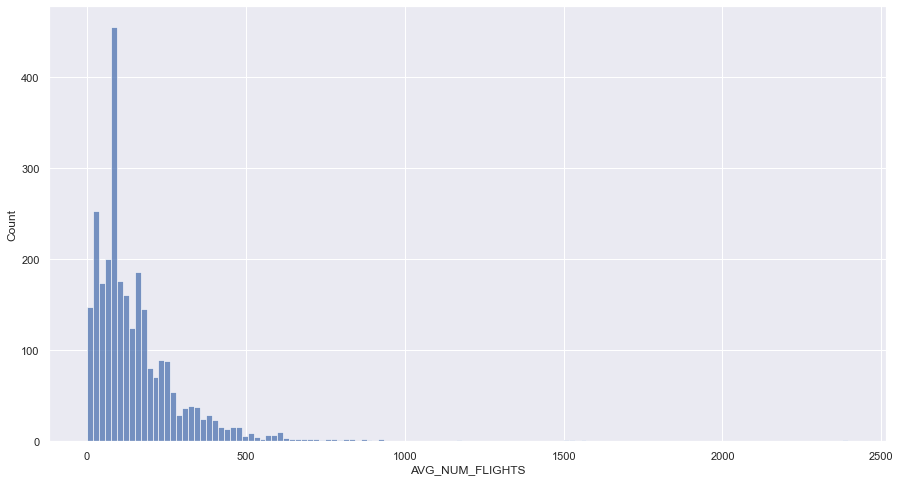

In [352]:
sns.histplot(trip_data['AVG_NUM_FLIGHTS'])

<AxesSubplot:xlabel='AVG_PROFIT', ylabel='Count'>

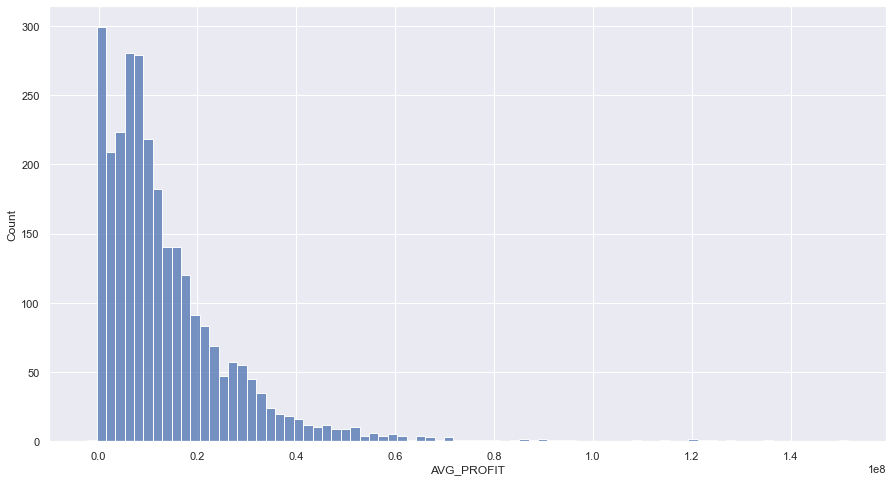

In [353]:
sns.histplot(trip_data['AVG_PROFIT'])

## Summarizing Insights

In [355]:
trip_data.describe().T

count          mean           std           min  \
FLIGHT_COUNT        2771.0  3.254594e+02  3.649376e+02  1.000000e+00   
NUM_AIRLINES        2771.0  2.090761e+00  1.469414e+00  1.000000e+00   
AVG_ARR_DELAY       2771.0 -6.276525e+00  6.731531e+00 -3.100000e+01   
AVG_DEP_DELAY       2771.0 -2.267232e+00  5.621721e+00 -1.600000e+01   
DISTANCE            2771.0  8.858829e+02  6.159140e+02  3.100000e+01   
AIRTIME             2771.0  1.226356e+02  7.225680e+01  1.148235e+01   
AVG_OCCUPANCY_RATE  2771.0  6.504887e-01  1.813801e-02  4.675000e-01   
AIRPORT_COST        2771.0  1.836341e+04  2.531609e+03  1.000000e+04   
MISC_COST           2771.0  1.626481e+04  1.130818e+04  5.691600e+02   
LATE_FEES           2771.0  5.627030e+01  1.255089e+03  0.000000e+00   
TRIP_COST           2771.0  3.468449e+04  1.199495e+04  1.056916e+04   
FARE_PER_PASSENGER  2771.0  4.260035e+02  1.340536e+02  1.100000e+01   
NUM_PASSENGERS      2771.0  2.606907e+02  7.246011e+00  1.870000e+02   
BASE_REVENUE        2771.0  1.110991e+05  3.521592e+04  2.838000e+03   
LUGGAGE_REVENUE     2771.0  9.124175e+03  2.536104e+02  6.545000e+03   
TRIP_REVENUE        2771.0  1.202232e+05  3.524962e+04  1.186800e+04   
TRIP_PROFIT         2771.0  8.553874e+04  3.282619e+04 -9.508400e+03   
TOTAL_PROFIT        2771.0  2.870118e+07  3.111075e+07 -2.310541e+06   
TOTAL_COST          2771.0  1.080764e+07  1.301866e+07  2.423508e+04   
TOTAL_REVENUE       2771.0  3.950882e+07  4.294342e+07  4.282300e+04   
AVG_PROFIT          2771.0  1.391483e+07  1.439233e+07 -2.310541e+06   
AVG_NUM_FLIGHTS     2771.0  1.557990e+02  1.491364e+02  1.000000e+00   

                             25%           50%           75%           max  
FLIGHT_COUNT        8.700000e+01  2.250000e+02  4.215000e+02  4.155000e+03  
NUM_AIRLINES        1.000000e+00  2.000000e+00  3.000000e+00  9.500000e+00  
AVG_ARR_DELAY      -9.000000e+00 -6.500000e+00 -4.000000e+00  2.080000e+02  
AVG_DEP_DELAY      -4.000000e+00 -2.500000e+00 -1.000000e+00  2.175000e+02  
DISTANCE            4.405000e+02  7.480000e+02  1.134189e+03  4.243000e+03  
AIRTIME             6.975010e+01  1.070000e+02  1.532778e+02  4.642338e+02  
AVG_OCCUPANCY_RATE  6.436423e-01  6.501733e-01  6.570911e-01  8.800000e-01  
AIRPORT_COST        1.500000e+04  2.000000e+04  2.000000e+04  2.000000e+04  
MISC_COST           8.087580e+03  1.373328e+04  2.082371e+04  7.790148e+04  
LATE_FEES           0.000000e+00  0.000000e+00  0.000000e+00  5.932500e+04  
TRIP_COST           2.625158e+04  3.224612e+04  3.962684e+04  9.902528e+04  
FARE_PER_PASSENGER  3.463788e+02  4.219877e+02  5.078686e+02  1.999000e+03  
NUM_PASSENGERS      2.580000e+02  2.610000e+02  2.630000e+02  3.520000e+02  
BASE_REVENUE        8.997354e+04  1.099514e+05  1.326077e+05  5.197400e+05  
LUGGAGE_REVENUE     9.030000e+03  9.135000e+03  9.205000e+03  1.232000e+04  
TRIP_REVENUE        9.910500e+04  1.191128e+05  1.417300e+05  5.288400e+05  
TRIP_PROFIT         6.572893e+04  8.363976e+04  1.056634e+05  5.120224e+05  
TOTAL_PROFIT        6.842442e+06  1.902550e+07  3.905431e+07  3.199914e+08  
TOTAL_COST          3.033472e+06  6.754613e+06  1.358762e+07  2.053539e+08  
TOTAL_REVENUE       9.984128e+06  2.670188e+07  5.290891e+07  5.253453e+08  
AVG_PROFIT          5.020937e+06  9.778041e+06  1.836782e+07  1.516284e+08  
AVG_NUM_FLIGHTS     6.900000e+01  1.120000e+02  2.010000e+02  2.395000e+03

#### Checking the late % for the above subset of flights

In [356]:
# late_pct = flights.groupby('TRIP').agg({'LATE_FEES':['count',np.count_nonzero]}).reset_index()
def find_positive_pct(df):
    return df[df['LATE_FEES'] > 0].shape[0]/df.shape[0]

late_pct = flights.groupby('TRIP').apply(find_positive_pct).reset_index()
late_pct.columns = ['TRIP','LATE_PCT']
late_pct['ROUND_TRIP'] = late_pct['TRIP'].apply(lambda x: make_key(x))

late_data = late_pct.groupby('ROUND_TRIP')['LATE_PCT'].mean().reset_index()
late_data.head()

ROUND_TRIP  LATE_PCT
0    ABE-ATL  0.191244
1    ABE-CLT  0.163347
2    ABE-DTW  0.227823
3    ABE-FLL  0.200000
4    ABE-ORD  0.367925

In [357]:
trip_data = pd.merge(trip_data,
                     late_data,
                     on = 'ROUND_TRIP',
                     how = 'inner')

### Preprocessing for Visualization

In [358]:
trip_data['ORIGIN'] = trip_data['ROUND_TRIP'].apply(lambda x: x.split('-')[0])
trip_data['DESTINATION'] = trip_data['ROUND_TRIP'].apply(lambda x: x.split('-')[1])

In [359]:
trip_data = pd.merge(trip_data,
                            US_airport_subset[['IATA_CODE','COORDINATES']],
                            left_on = 'ORIGIN',
                            right_on = 'IATA_CODE',
                            how = 'inner')

In [360]:
trip_data.drop(['IATA_CODE'], axis = 1, inplace=True)
trip_data.rename(columns={'COORDINATES':'SOURCE_COORDINATES'}, inplace=True)

In [361]:
trip_data = pd.merge(trip_data,
                            US_airport_subset[['IATA_CODE','COORDINATES']],
                            left_on = 'DESTINATION',
                            right_on = 'IATA_CODE',
                            how = 'inner')

In [362]:
trip_data.drop(['IATA_CODE'], axis = 1, inplace=True)
trip_data.rename(columns={'COORDINATES':'DESTINATION_COORDINATES'}, inplace=True)

In [363]:
trip_data['SOURCE_LONG'] = trip_data['SOURCE_COORDINATES'].apply(lambda x: float(x.split(',')[0]))
trip_data['SOURCE_LAT'] = trip_data['SOURCE_COORDINATES'].apply(lambda x: float(x.split(',')[1]))
trip_data['DESTINATION_LONG'] = trip_data['DESTINATION_COORDINATES'].apply(lambda x: float(x.split(',')[0]))
trip_data['DESTINATION_LAT'] = trip_data['DESTINATION_COORDINATES'].apply(lambda x: float(x.split(',')[1]))

In [365]:
# Fuction to plot the geographic mapping
def plot_flight_path(df, title):
    
    airport_list = list(set(list(df['ORIGIN'].values) + list(df['DESTINATION'].values)))
    airports = US_airport_subset[US_airport_subset['IATA_CODE'].isin(airport_list)][['IATA_CODE','COORDINATES']]
    airports['LONG'] = airports['COORDINATES'].apply(lambda x: float(x.split(',')[0]))
    airports['LAT'] = airports['COORDINATES'].apply(lambda x: float(x.split(',')[1]))
    
    fig = go.Figure()

    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = airports['LONG'],
        lat = airports['LAT'],
#         hoverinfo = 'text',
#         text = 'AIRPORT',
        mode = 'markers',
        marker = dict(
            size = 5,
            color = 'rgb(255, 0, 0)',
            line = dict(
                width = 4,
                color = 'rgba(68, 68, 68, 0)'
            )
        )))

    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = airports['LONG'],
        lat = airports['LAT'],
        hoverinfo = 'text',
        text = airports['IATA_CODE'],
        mode = 'text',
        ))

    
    lons = []
    lats = []
    import numpy as np

    lons = np.empty(3 * len(df))
    lons[::3] = df['SOURCE_LONG']
    lons[1::3] = df['DESTINATION_LONG']
    lons[2::3] = None

    lats = np.empty(3 * len(df))
    lats[::3] = df['SOURCE_LAT']
    lats[1::3] = df['DESTINATION_LAT']
    lats[2::3] = None

    fig.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = lons,
            lat = lats,
            mode = 'lines',
            line = dict(width = 1,color = 'green'),
            opacity = 0.5
        )
    )

    fig.update_layout(
        title_text = title,
        showlegend = False,
        geo = go.layout.Geo(
            scope = 'north america',
            projection_type = 'azimuthal equal area',
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
        height=700,
    )

    fig.show()

### 1. Top 10 Busiest round trips in terms of number of flights in a quarter

In [366]:
busiest_routes = trip_data.sort_values(by='FLIGHT_COUNT', ascending=False).head(10)
busiest_routes[['ROUND_TRIP','FLIGHT_COUNT','NUM_AIRLINES','AVG_NUM_FLIGHTS']]

ROUND_TRIP  FLIGHT_COUNT  NUM_AIRLINES  AVG_NUM_FLIGHTS
1043    LAX-SFO          4155           7.0            594.0
168     LGA-ORD          3562           6.0            594.0
564     LAS-LAX          3250           8.0            407.0
562     JFK-LAX          3138           4.0            785.0
975     LAX-SEA          2492           6.0            416.0
1756    BOS-LGA          2398           5.0            480.0
1520    HNL-OGG          2395           1.0           2395.0
993     PDX-SEA          2375           5.0            475.0
591     ATL-MCO          2351           5.0            471.0
1752    ATL-LGA          2291           5.0            459.0

In [367]:
plot_flight_path(busiest_routes, 'Top 10 Busiest flight paths')

### 2. Top 10 Profitable round trips in terms of total profit in a quarter

In [368]:
profitable_routes = trip_data.sort_values(by='AVG_PROFIT', ascending=False).head(10)
profitable_routes[['ROUND_TRIP','NUM_AIRLINES','AVG_PROFIT']]

ROUND_TRIP  NUM_AIRLINES    AVG_PROFIT
1520    HNL-OGG           1.0  1.516284e+08
1664    CLT-GSP           1.0  1.345315e+08
2617    CLT-FLO           1.0  1.285176e+08
392     DAL-HOU           1.0  1.235423e+08
1037    IAH-SFO           1.0  1.218667e+08
1805    ATL-MEM           1.0  1.200684e+08
310     CLT-DFW           1.0  1.196460e+08
1852    DFW-MIA           1.0  1.140765e+08
2233    ATL-SAV           1.0  1.095218e+08
288     AUS-DFW           1.0  9.493692e+07

In [369]:
plot_flight_path(profitable_routes, 'Top 10 Profitable routes')

#### Summary Cols

In [370]:
drop_cols = ['ORIGIN','DESTINATION','SOURCE_COORDINATES','DESTINATION_COORDINATES','SOURCE_LONG',
             'SOURCE_LAT','DESTINATION_LONG','DESTINATION_LAT']
trip_data[trip_data['ROUND_TRIP'].isin(profitable_routes['ROUND_TRIP'].head(10).values)].drop(drop_cols, axis=1).T

288               310               392   \
ROUND_TRIP                   AUS-DFW           CLT-DFW           DAL-HOU   
FLIGHT_COUNT                     932               892              1529   
NUM_AIRLINES                     1.0               1.0               1.0   
AVG_ARR_DELAY                   -2.5              -2.0              -7.0   
AVG_DEP_DELAY                   -2.5              -0.5               0.0   
DISTANCE                       190.0             936.0             239.0   
AIRTIME                    38.686138        130.430552         43.972204   
AVG_OCCUPANCY_RATE          0.642837          0.646295          0.654385   
AIRPORT_COST                   20000             20000             20000   
MISC_COST                     3488.4          17184.96           4388.04   
LATE_FEES                        0.0               0.0               0.0   
TRIP_COST                    23488.4          37184.96          24388.04   
FARE_PER_PASSENGER        450.860656        626.456379        366.478946   
NUM_PASSENGERS                 258.0             259.0             262.0   
BASE_REVENUE            116322.04918     162252.202147      96017.483767   
LUGGAGE_REVENUE               9030.0            9065.0            9170.0   
TRIP_REVENUE            125352.04918     171317.202147     105187.483767   
TRIP_PROFIT             101863.64918     134132.242147      80799.443767   
TOTAL_PROFIT         94936921.036066  119645959.995023  123542349.520167   
TOTAL_COST                21891188.8       33168984.32       37289313.16   
TOTAL_REVENUE       116828109.836066  152814944.315024  160831662.680167   
AVG_PROFIT           94936921.036066  119645959.995023  123542349.520167   
AVG_NUM_FLIGHTS                932.0             892.0            1529.0   
LATE_PCT                    0.206928          0.233895          0.219424   

                                1037              1520           1664  \
ROUND_TRIP                   IAH-SFO           HNL-OGG        CLT-GSP   
FLIGHT_COUNT                     803              2395            771   
NUM_AIRLINES                     1.0               1.0            1.0   
AVG_ARR_DELAY                   -2.0              -3.0           -7.5   
AVG_DEP_DELAY                   -0.5              -3.0           -3.0   
DISTANCE                      1635.0             100.0           75.0   
AIRTIME                   208.467531         22.813894      23.908643   
AVG_OCCUPANCY_RATE          0.645697          0.647686       0.649711   
AIRPORT_COST                   20000             15000          20000   
MISC_COST                    30018.6            1836.0         1377.0   
LATE_FEES                        0.0               0.0            0.0   
TRIP_COST                    50018.6           16836.0        21377.0   
FARE_PER_PASSENGER        744.084615        273.255319     718.333333   
NUM_PASSENGERS                 259.0             260.0          260.0   
BASE_REVENUE           192717.915385      71046.382979  186766.666667   
LUGGAGE_REVENUE               9065.0            9100.0         9100.0   
TRIP_REVENUE           201782.915385      80146.382979  195866.666667   
TRIP_PROFIT            151764.315385      63310.382979  174489.666667   
TOTAL_PROFIT        121866745.253846  151628367.234043    134531533.0   
TOTAL_COST                40164935.8        40322220.0     16481667.0   
TOTAL_REVENUE       162031681.053846  191950587.234043    151013200.0   
AVG_PROFIT          121866745.253846  151628367.234043    134531533.0   
AVG_NUM_FLIGHTS                803.0            2395.0          771.0   
LATE_PCT                    0.321744          0.085553       0.148765   

                                1805              1852              2233  \
ROUND_TRIP                   ATL-MEM           DFW-MIA           ATL-SAV   
FLIGHT_COUNT                     839               876               767   
NUM_AIRLINES                     1.0               1.0               1.0   
A

### 3. Recommendation

**We consider top 10 busiest and top 10 profitable routes as candidate regions for setting up operations. Since punctuality is a big part of the company brand image, we factor in the late time as well on a particular route.**

**Also, we can observe that most of the top 10 profitable airlines is because of it being served by just a single airline for that route. This would make a competitor entry difficult. Hence we also factor in the number of airlines served by the route and put a minimum cap of being served by 3 airlines for the recommendation for easier market entry.**

In [371]:
busy_list = list(busiest_routes['ROUND_TRIP'].head(10).values)
profit_list = list(profitable_routes['ROUND_TRIP'].head(10).values)

filter_list = list(set(busy_list + profit_list))
trips_subset = trip_data[(trip_data['ROUND_TRIP'].isin(filter_list)) &
                         (trip_data['NUM_AIRLINES'] >= 3)]

In [372]:
trips_subset.sort_values(by='LATE_PCT').head(5).T

591  \
ROUND_TRIP                                              ATL-MCO   
FLIGHT_COUNT                                               2351   
NUM_AIRLINES                                                5.0   
AVG_ARR_DELAY                                              -5.5   
AVG_DEP_DELAY                                              -1.5   
DISTANCE                                                  404.0   
AIRTIME                                               62.800033   
AVG_OCCUPANCY_RATE                                     0.649486   
AIRPORT_COST                                              20000   
MISC_COST                                               7417.44   
LATE_FEES                                                   0.0   
TRIP_COST                                              27417.44   
FARE_PER_PASSENGER                                    339.35443   
NUM_PASSENGERS                                            260.0   
BASE_REVENUE                                       88232.151899   
LUGGAGE_REVENUE                                          9100.0   
TRIP_REVENUE                                       97332.151899   
TRIP_PROFIT                                        69914.711899   
TOTAL_PROFIT                                   164369487.673924   
TOTAL_COST                                          64458401.44   
TOTAL_REVENUE                                  228827889.113924   
AVG_PROFIT                                      32873897.534785   
AVG_NUM_FLIGHTS                                           471.0   
LATE_PCT                                               0.163572   
ORIGIN                                                      ATL   
DESTINATION                                                 MCO   
SOURCE_COORDINATES                          -84.428101, 33.6367   
DESTINATION_COORDINATES  -81.30899810791016, 28.429399490356445   
SOURCE_LONG                                          -84.428101   
SOURCE_LAT                                              33.6367   
DESTINATION_LONG                                     -81.308998   
DESTINATION_LAT                                       28.429399   

                                               562                        993  \
ROUND_TRIP                                 JFK-LAX                    PDX-SEA   
FLIGHT_COUNT                                  3138                       2375   
NUM_AIRLINES                                   4.0                        5.0   
AVG_ARR_DELAY                                -11.0                       -1.0   
AVG_DEP_DELAY                                 -2.5                       -2.0   
DISTANCE                                    2475.0                      129.0   
AIRTIME                                 315.258233                  31.647878   
AVG_OCCUPANCY_RATE                        0.649976                   0.649967   
AIRPORT_COST                                 20000                      20000   
MISC_COST                                  45441.0                    2368.44   
LATE_FEES                                      0.0                        0.0   
TRIP_COST                                  65441.0                   22368.44   
FARE_PER_PASSENGER                      608.900158                 281.356962   
NUM_PASSENGERS                               260.0                      260.0   
BASE_REVENUE                         158314.040995               73152.810127   
LUGGAGE_REVENUE                             9100.0                     9100.0   
TRIP_REVENUE                         167414.040995               82252.810127   
TRIP_PROFIT                          101973.040995               59884.370127   
TOTAL_PROFIT                      319991402.642752           142225379.050633   
TOTAL_COST                             205353858.0                 53125045.0   
TOTAL_REVENUE                     525345260.642752           195350424.050633   
AVG_PROFIT                         79997850.660688            2844

#### Recommended round trips

In [373]:
recommended_trips = trips_subset.sort_values(by='LATE_PCT').head(5)['ROUND_TRIP'].values
recommended_trip = trips_subset[trips_subset['ROUND_TRIP'].isin(recommended_trips)]
recommended_trip.drop(['TOTAL_PROFIT','TOTAL_COST','TOTAL_REVENUE'], axis = 1, inplace=True)

In [374]:
recommended_trip['ORIGIN'] = recommended_trip['ROUND_TRIP'].apply(lambda x: x.split('-')[0])
recommended_trip['DESTINATION'] = recommended_trip['ROUND_TRIP'].apply(lambda x: x.split('-')[1])
recommended_trip[['ORIGIN','DESTINATION','AVG_PROFIT']]

ORIGIN DESTINATION    AVG_PROFIT
562    JFK         LAX  7.999785e+07
564    LAS         LAX  1.962375e+07
591    ATL         MCO  3.287390e+07
975    LAX         SEA  2.722923e+07
993    PDX         SEA  2.844508e+07

### 4. Number of flights to breakeven

In [375]:
recommended_trip['FLIGHTS_TO_BREAKEVEN'] = np.ceil(90*1000000/recommended_trip['TRIP_REVENUE'])
recommended_trip['AVG_FLIGHTS'] = round(recommended_trip['FLIGHT_COUNT']/recommended_trip['NUM_AIRLINES'],0)
recommended_trip['NUM_QUARTER_TO_BREAKEVEN'] = np.ceil(recommended_trip['FLIGHTS_TO_BREAKEVEN']/recommended_trip['AVG_FLIGHTS'])

#### Time taken to breakeven

In [376]:
recommended_trip[['ROUND_TRIP','FLIGHTS_TO_BREAKEVEN','AVG_FLIGHTS','NUM_QUARTER_TO_BREAKEVEN','FARE_PER_PASSENGER']]

ROUND_TRIP  FLIGHTS_TO_BREAKEVEN  AVG_FLIGHTS  NUM_QUARTER_TO_BREAKEVEN  \
562    JFK-LAX                 538.0        784.0                       1.0   
564    LAS-LAX                1240.0        406.0                       4.0   
591    ATL-MCO                 925.0        470.0                       2.0   
975    LAX-SEA                 874.0        415.0                       3.0   
993    PDX-SEA                1095.0        475.0                       3.0   

     FARE_PER_PASSENGER  
562          608.900158  
564          244.375259  
591          339.354430  
975          358.417495  
993          281.356962

In [377]:
plot_flight_path(recommended_trip, 'Recommended Trips')

### 5. KPI's to track for future

The airlines industry is made up of companies whose primary business activities are focused on air transportation for passengers and cargo and includes major network carriers, regional carriers and low-cost carriers. Below is current consensus forecast data on capacity metrics, such as available seat miles (ASMs); utilization metrics, such as load factor; and other airline KPIs used to look for an investment edge, including revenue passenger miles (RPMs), passenger revenue per mile flown (PRASM), total costs and expenses per ASM (CASM) and fuel expenses. These key airline metrics aid market participants in identifying airline trends and future performance of airline companies, including Southwest Airlines, Air Canada, Air China and more.

From the above data analysis the basic understanding of the airline market expectations whether at a company or an industry level should be establsihed. 

There are two Metrics that can be looked into for further use.
  
  1. **PRASM**: Passenger Revenue per Available Seat Mile is calculated by dividing passenger revenue by available seat miles. PRASM is also equivalent to the product of load factor and passenger yield. 
  2. **TRASM**: Total Revenue per Available Seat Mile is calculated by a sum of total revenue, ancillary revenue and cargo revenue
Both these metrics have few common KPI's which are catagorized into:
  1. Volume factors
  2. Price Factors  
  3. Utilizations facotrs 
  
These can be further broken down into few other key factors:
  - **PLF**:Passenger Load Factor(%) is a measure of number revenue passengers miles(or km) expressed as percentage of ASM.
  - **Revenue Passenger Miles(RPM)** is a measure of volume and is calculated by number of passengers multiplied by the miles of a flight.
  - **Passesger(ASM) Available Seat Miles** is a measure of airline capacity and is calculated by taking the number of seats available multiplied by distance. 
  - **Traffic** = Capacity * PLF 
  - **Revenue Per Available Seat Mile(RASM)** is calulated by dividing passenger revenue by avaliable seat miles.
  - **Cost per Available Seat Mile(CASM)** is a measure of effiency and is calculated by taking operating expenses and dividing by ASM.
  - **CASM-Ex** is calculated by operating expenses dividing by ASM and then subtracting the cost of fuel.
  - **Yield** is defined by Passenger Yield Cents and Cargo Yield Cents
  - **Revenue** = Traffic * Yield
  - **Operating Income** = Revenue - Operating Expenses(labor compensation, fuel consumption, airport landing fees, airport maintainence)


### What's next?

In the analysis, we have aggregated the data at a **ROUND TRIP** level. That is all flights flying from a particular ORIGIN to DESTINATION and back, irrespective of the carrier, have been considered equal. This may introduce **SIMPSONS PARADOX** in the form of **AGGREGATION BIAS** and analyzing the above information at a carrier level may bring out additional insights.  
  
Further, another factor that we have ignored in this analysis is **TIME**. We have considered all the flights at a **QUARTER** level. We can further break this down into **MONTH, WEEK and DAY level** data to obtain additional insights.
